# Assess Clinical Outcome Risk

In [2]:
import pandas as pd
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(30,  30)})

c:\Users\jeygu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
pluri_patients = pd.read_csv('../data/raw/pluri_patients_2020.csv', sep = ';')
pd.options.display.max_columns = None

In [4]:
pluri_patients.head()

,edad,sexo,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,...,tasa_de_filtración_glomerular_tfg,estadio_de_la_enfermedad_renal,microalbuminuria,tsh,clase_funcional,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg,úlcera_de_pie_diabético,estado_vital
0,29,F,1,1,0,3,9,2,0,0,...,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
1,67,F,1,0,0,0,1,0,0,0,...,"60,13",Estadio 2,"3,02","5,770",Clase funcional 2B,"0,86","60,13","0,00",No,vivo
2,83,M,1,0,0,4,3,0,0,0,...,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
3,66,M,1,1,1,0,2,13,0,0,...,"58,09",Estadio 3A,"7,00","1,170",Clase funcional 4,"0,00","0,00","0,00",No,fallecido
4,62,F,2,0,0,2,8,0,0,0,...,"107,76",Estadio 1,"68,00","2,890",Clase funcional 2B,"0,00","0,00","0,00",No,vivo


In [6]:
estancias=pluri_patients.iloc[:,2:10]

estancias["hospitalizacion"]=pluri_patients["n_hosp"].apply(lambda x: x>0)
estancias["urgencias"]=pluri_patients["n_urg"].apply(lambda x: x>0)
estancias["estado_vital"]=pluri_patients["estado_vital"].apply(lambda x: x=='vivo')
estancias.head()

,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,hospitalizacion,urgencias,estado_vital
0,1,1,0,3,9,2,0,0,True,True,True
1,1,0,0,0,1,0,0,0,False,True,True
2,1,0,0,4,3,0,0,0,False,True,True
3,1,1,1,0,2,13,0,0,True,True,False
4,2,0,0,2,8,0,0,0,False,True,True


In [7]:
estancias.describe()

,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci
count,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000
mean,0.359826,0.585919,0.106877,1.360189,3.471239,1.700054,0.096171,0.142624
std,0.803064,1.745051,0.471713,1.906433,4.249889,5.522486,0.888220,1.526053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000
max,9.000000,39.000000,11.000000,16.000000,39.000000,120.000000,23.000000,45.000000


In [8]:
estancias["hospitalizacion"].value_counts()

False    4298
True     1213
Name: hospitalizacion, dtype: int64

In [9]:
estancias["urgencias"].value_counts()

False    4204
True     1307
Name: urgencias, dtype: int64

In [10]:
estancias.corr()

,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,hospitalizacion,urgencias,estado_vital
n_urg,1.000000,0.616465,0.206998,0.135109,0.149295,0.552120,0.190901,0.090214,0.630787,0.803665,-0.220056
n_hosp,0.616465,1.000000,0.298281,0.085973,0.100954,0.548560,0.317954,0.304257,0.632080,0.489275,-0.213720
n_cx,0.206998,0.298281,1.000000,0.072218,0.182096,0.341491,0.372239,0.174211,0.287249,0.205595,-0.050871
n_ce_med_general,0.135109,0.085973,0.072218,1.000000,0.348267,0.042568,0.003440,0.010972,0.103178,0.113516,0.117161
n_ce_med_especializada,0.149295,0.100954,0.182096,0.348267,1.000000,0.109071,0.043475,0.002591,0.151850,0.137644,0.096219
estancia_sala,0.552120,0.548560,0.341491,0.042568,0.109071,1.000000,0.182812,0.100391,0.559853,0.420896,-0.201124
estancia_uce,0.190901,0.317954,0.372239,0.003440,0.043475,0.182812,1.000000,0.177329,0.203830,0.133681,-0.078849
estancia_uci,0.090214,0.304257,0.174211,0.010972,0.002591,0.100391,0.177329,1.000000,0.170774,0.112555,-0.145156
hospitalizacion,0.630787,0.632080,0.287249,0.103178,0.151850,0.559853,0.203830,0.170774,1.000000,0.699477,-0.296758
urgencias,0.803665,0.489275,0.205595,0.113516,0.137644,0.420896,0.133681,0.112555,0.699477,1.000000,-0.238658


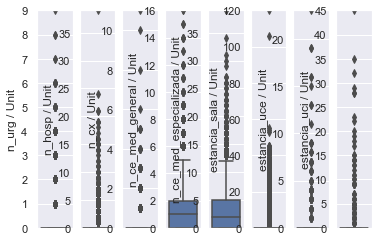

In [11]:
fig, axes = plt.subplots(1, estancias.shape[1]-3)
for i, col in enumerate(estancias.columns[:-3]):
    ax = sns.boxplot(y=estancias[col], ax=axes.flatten()[i])
    ax.set_ylim(estancias[col].min(), estancias[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.rcParams['figure.figsize'] = (78,26)
plt.show()

In [12]:
profile = ProfileReport(pluri_patients, minimal=True)

In [13]:
# to write the report
profile.to_file("../reports/pluri_patients_minimal.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 38.13it/s]


In [14]:
chronic_diseases  = pluri_patients.iloc[:,10:66] # select chronic diseases columns
chronic_diseases["hospitalizacion"] = pluri_patients["n_hosp"].apply(lambda x: int(x>0))
chronic_diseases["urgencias"] = pluri_patients["n_urg"].apply(lambda x: int(x>0))
chronic_diseases["estado_vital"] = pluri_patients["estado_vital"].apply(lambda x: int(x=='vivo'))
chronic_diseases.head()

,pancreatobiliar,glaucoma,hipertension,cerebrovascular,vertigo_y_alteraciones_auditivas,bradicardias_y_enfermedades_de_la_conduccion,otras_genitourinarias,depresion_y_alteraciones_del_animo,epoc,enfermedad_renal_cronica,...,lumbalgia_cronica,otras_enfermedades_cardiovasculares,parkinson,cancer,fibrilacion_auricular,diabetes,falla_cardiaca,hospitalizacion,urgencias,estado_vital
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,1
2,0,0,4,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,1,1,0
4,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,1


In [15]:
sns.diverging_palette(20, 220, n = 9)

[(0.7634747047461135, 0.3348456555528834, 0.225892295531744),
 (0.8104957325994613, 0.4877733018117068, 0.40600765842877506),
 (0.8582485940772356, 0.6430811085805399, 0.5889263305017547),
 (0.9052696219305835, 0.7960087548393634, 0.7690416933987858),
 (0.9426203143802194, 0.9476186718337934, 0.9499283364742905),
 (0.764598723186337, 0.8346048011319588, 0.8572576805578844),
 (0.5891792627967477, 0.7208941125350526, 0.7620977191012962),
 (0.41512497557259387, 0.6080683587130622, 0.6676783244296923),
 (0.24715576253545807, 0.49918708160096675, 0.5765599057376697)]

### Calculate correlations

In [16]:
corr = chronic_diseases.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

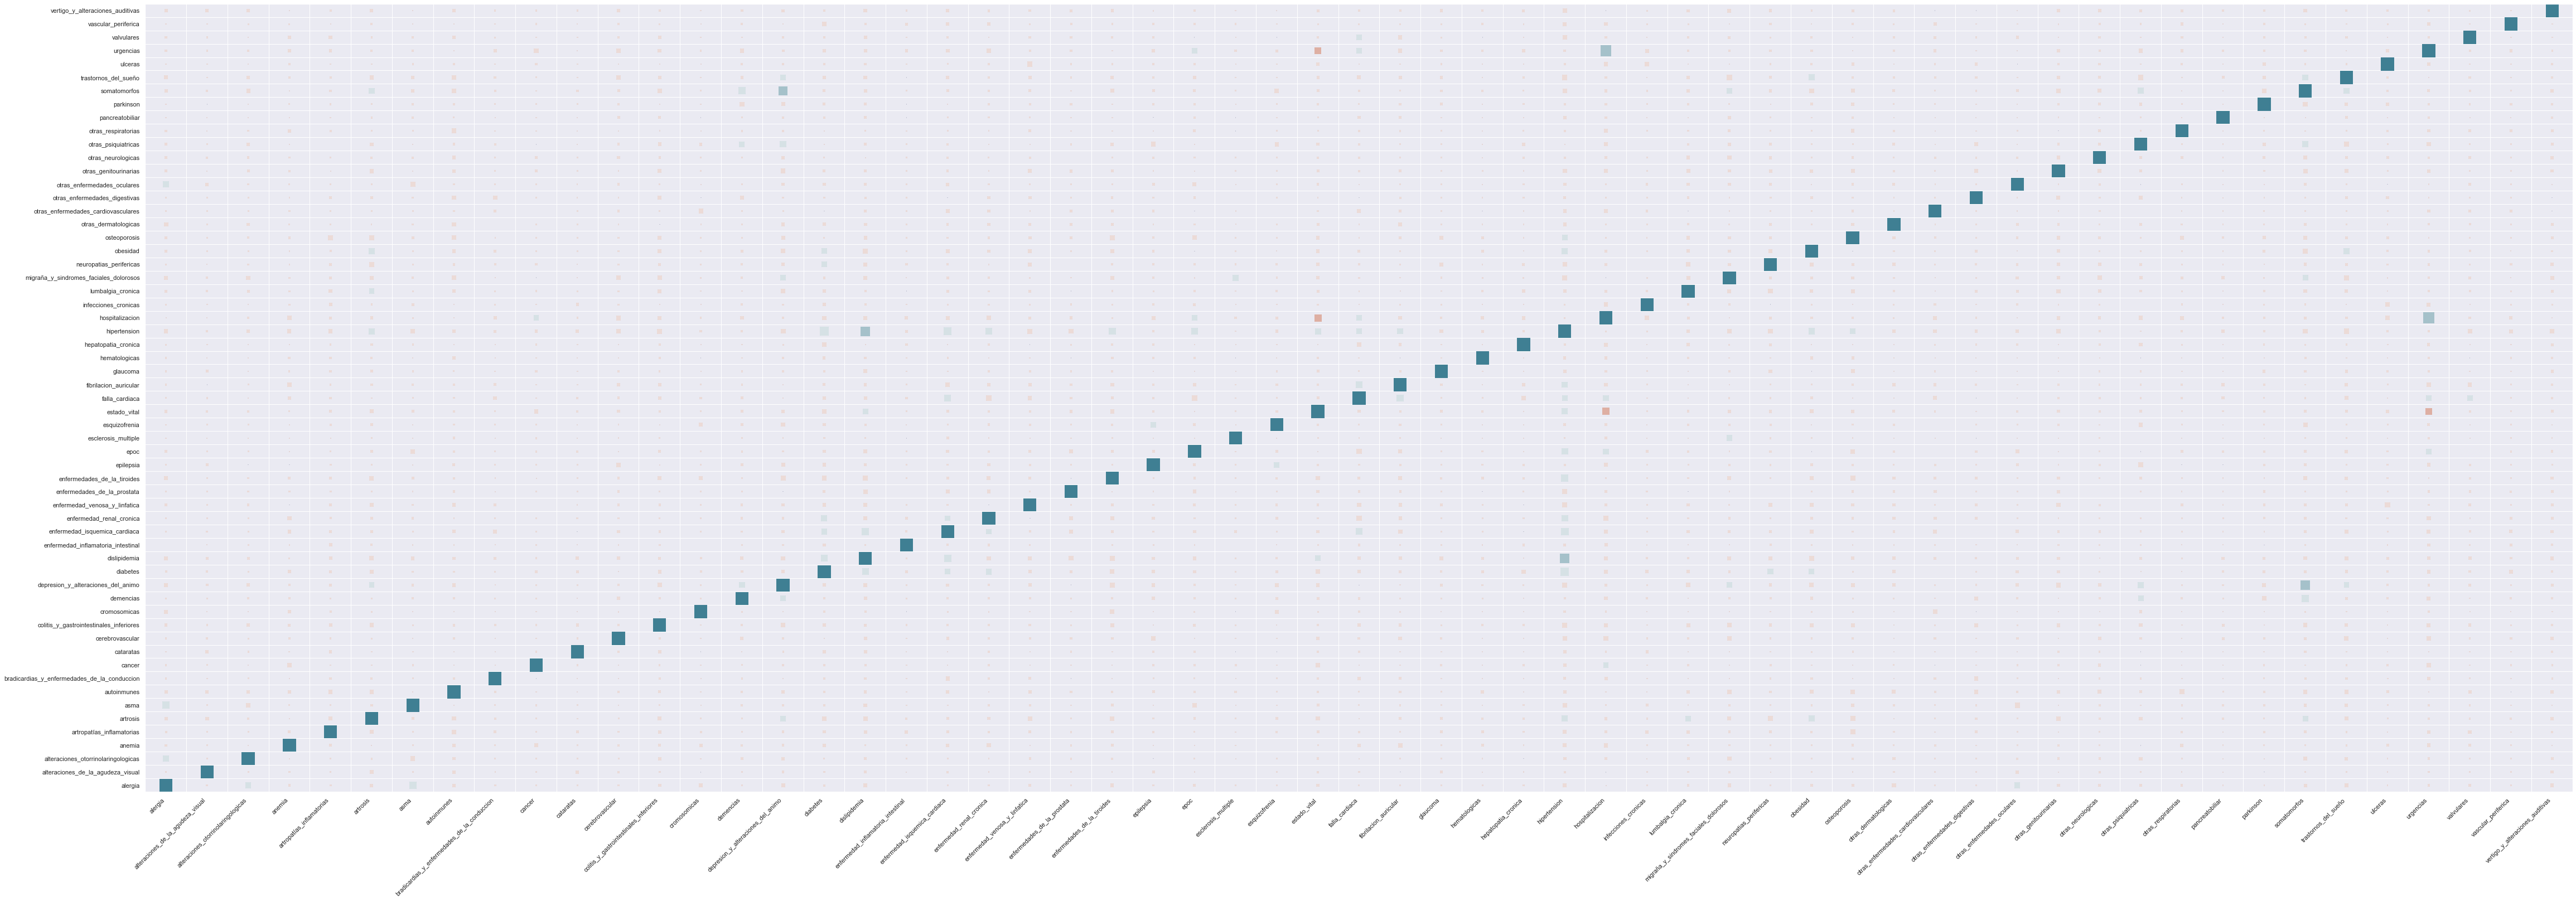

In [17]:
n_colors = 8 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]


def manual_heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    ax.scatter(
    x=x.map(x_to_num), # Use mapping for x
    y=y.map(y_to_num), # Use mapping for y
    s=size * size_scale, # Vector of square sizes, proportional to size parameter
    c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
    marker='s') # Use square as scatterplot marker

manual_heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color = corr['value']
)

In [19]:
chronic_diseases_pivoted = pd.melt(chronic_diseases)
chronic_diseases_agg = chronic_diseases_pivoted.groupby("variable").sum().sort_values("value", ascending = True)

<AxesSubplot:ylabel='variable'>

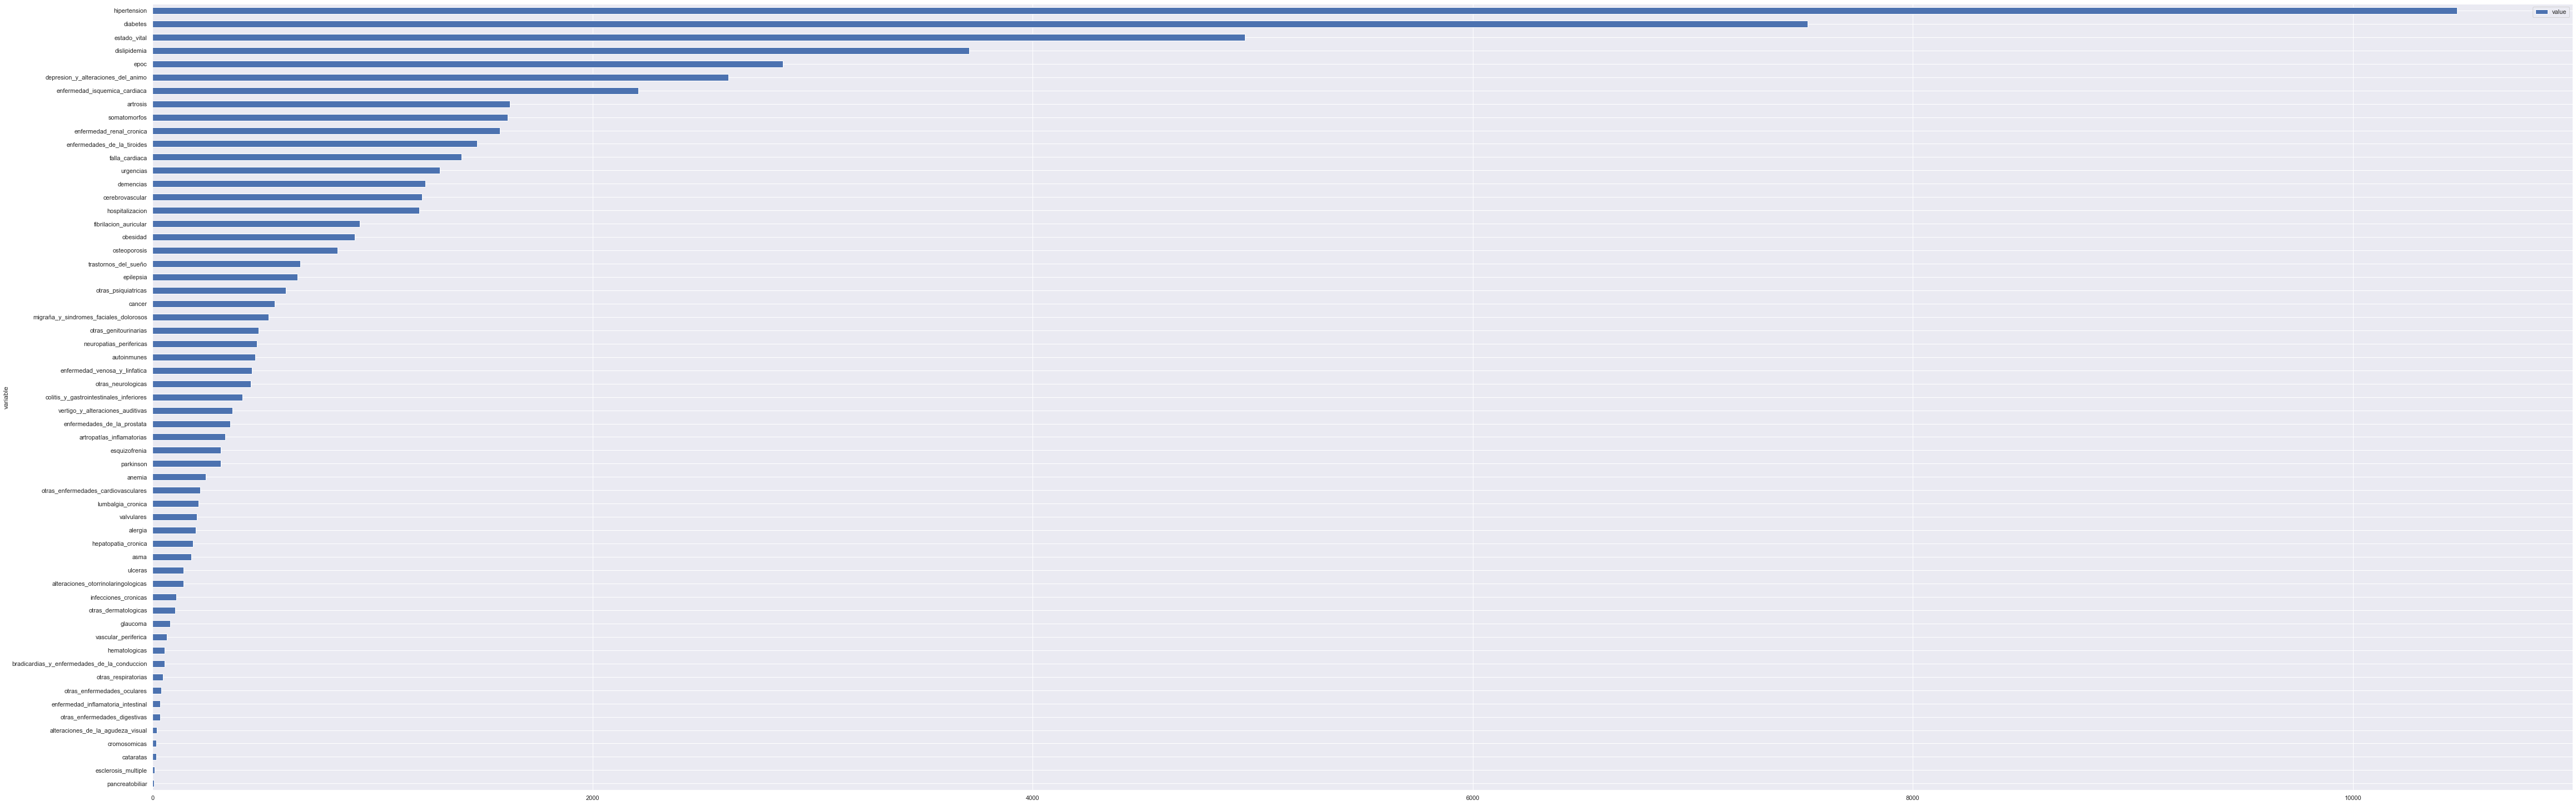

In [20]:
chronic_diseases_agg.plot(kind = "barh")

There is a group of 13 variables related to the patient's billing information during 2020, from now on we will refer to these as *billing variables*.

In [22]:
#Let's check the type of the billing variables
billing_variables = ["fact_otros", "fact_estancias", "fact_ayudas_dx", "fact_interconsultas", "fact_medicamentos_insumos",
                     "fact_otros_conceptos", "fact_procedimientos_paquetes_qx", "fact_rondas", "fact_banco_sangre", 
                     "fact_planta_oxigeno", "fact_consulta_externa", "fact_salud_oral", "fact_total"]

pluri_patients[billing_variables].dtypes

fact_otros                          int64
fact_estancias                     object
fact_ayudas_dx                     object
fact_interconsultas                object
fact_medicamentos_insumos          object
fact_otros_conceptos               object
fact_procedimientos_paquetes_qx    object
fact_rondas                        object
fact_banco_sangre                  object
fact_planta_oxigeno                 int64
fact_consulta_externa              object
fact_salud_oral                     int64
fact_total                         object
dtype: object

The data type for all the billing variables should be float but there are only three that meet the requirement, it is necessary to make the conversion.

In [24]:
for col in billing_variables:
    pluri_patients[col]= pluri_patients[col].astype(str).str.replace(",", ".").astype(float)

In [25]:
pluri_patients[billing_variables].dtypes

fact_otros                         float64
fact_estancias                     float64
fact_ayudas_dx                     float64
fact_interconsultas                float64
fact_medicamentos_insumos          float64
fact_otros_conceptos               float64
fact_procedimientos_paquetes_qx    float64
fact_rondas                        float64
fact_banco_sangre                  float64
fact_planta_oxigeno                float64
fact_consulta_externa              float64
fact_salud_oral                    float64
fact_total                         float64
dtype: object

Now, let's check if there are null or empty values in the billing variables

In [26]:
pluri_patients[billing_variables].isnull().any().sum()

0

In [27]:
pluri_patients[billing_variables].isnull().any().sum()

0

Just to be sure, we are goint to verify that the patient's total billing is the sum of the rest of variables and that there is no more missing information regarding to billing

In [28]:
total_sum = sum(abs(sum(pluri_patients[col] for col in billing_variables) - pluri_patients.fact_total*2))
total_sum

2.0917068468406796e-06

With this result (0) we confirm that a person's total billing is being discriminated in the dataset

#### Descriptive analysis

Taking into account that the sum of the first 12 variables is the total billing of a patient, let's see the most relevants variables or the ones that contributes the most to this final value.

In [31]:
(pluri_patients[billing_variables[0:12]].sum()*100/pluri_patients[billing_variables[0:12]].sum().sum()).sort_values(ascending = False)

fact_medicamentos_insumos          65.290610
fact_estancias                     14.239161
fact_ayudas_dx                      8.632151
fact_consulta_externa               3.356657
fact_otros_conceptos                3.236233
fact_planta_oxigeno                 1.475048
fact_procedimientos_paquetes_qx     1.407509
fact_rondas                         0.884472
fact_salud_oral                     0.676024
fact_interconsultas                 0.494613
fact_banco_sangre                   0.282409
fact_otros                          0.025114
dtype: float64

As paretto stated with the 80/20 we have two mayor variables that affect the most (79%) in terms of the total billing of a person, these are the drugs and supplies and the stay billing. 

Let's dig in 

In [32]:
pluri_patients[billing_variables].describe()

,fact_otros,fact_estancias,fact_ayudas_dx,fact_interconsultas,fact_medicamentos_insumos,fact_otros_conceptos,fact_procedimientos_paquetes_qx,fact_rondas,fact_banco_sangre,fact_planta_oxigeno,fact_consulta_externa,fact_salud_oral,fact_total
count,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03
mean,2.328322e+03,1.320137e+06,8.003013e+05,4.585639e+04,6.053203e+06,3.000366e+05,1.304925e+05,8.200088e+04,2.618261e+04,1.367542e+05,3.112014e+05,6.267530e+04,9.271169e+06
std,5.011347e+04,2.622849e+06,1.307366e+06,1.568393e+05,7.388460e+06,2.202937e+06,9.495756e+05,1.947254e+05,2.376724e+05,6.535212e+05,3.335660e+05,1.116572e+05,1.142249e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.066920e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.517145e+05,0.000000e+00,2.249415e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.740000e+04,0.000000e+00,3.617370e+06
50%,0.000000e+00,0.000000e+00,3.650926e+05,0.000000e+00,4.497173e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.084300e+05,3.400000e+04,6.667759e+06
75%,0.000000e+00,2.021904e+06,9.239492e+05,0.000000e+00,7.934516e+06,1.709750e+04,0.000000e+00,7.733540e+04,0.000000e+00,0.000000e+00,4.434340e+05,5.420000e+04,1.115052e+07
max,1.739431e+06,3.947940e+07,2.337378e+07,2.672456e+06,2.058979e+08,3.348660e+07,2.608574e+07,3.592219e+06,6.648882e+06,1.380079e+07,3.383679e+06,1.312500e+06,2.472228e+08


It is not very easy to identify important aspects of the data because of the way the number is presented, a box plot could give us a better image.

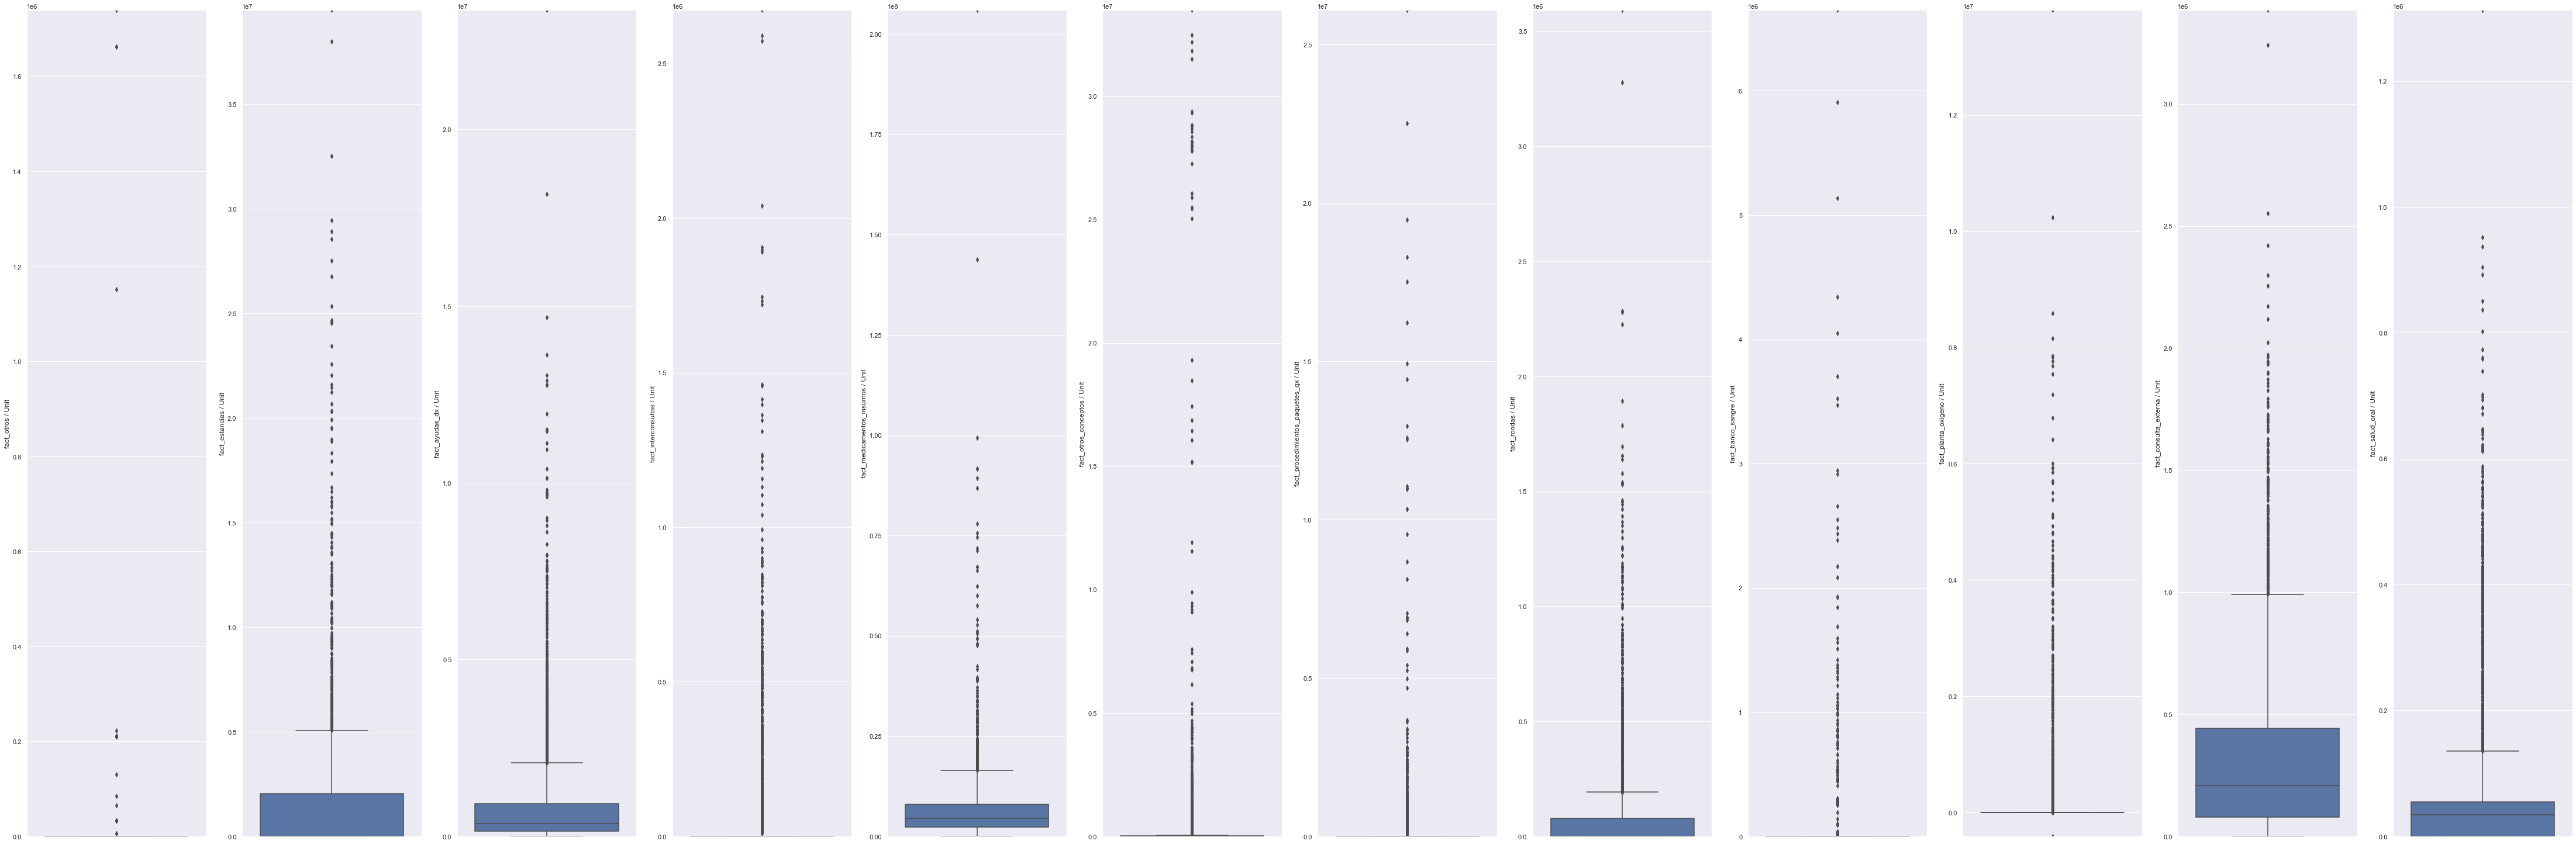

In [33]:
fig, axes = plt.subplots(1, pluri_patients[billing_variables].shape[1]-1)
for i, col in enumerate(pluri_patients[billing_variables].columns[:-1]):
    ax = sns.boxplot(y=pluri_patients[col], ax=axes.flatten()[i])
    ax.set_ylim(pluri_patients[col].min(), pluri_patients[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.rcParams['figure.figsize'] = (78,26)
plt.show()

The box plot indicates that the data is widely dispersed with several atypical values, however these values shouldn't be removed because they can be a indicator of the vital state of a patient.
Also, billing is one of the most critical aspects in Health Care Providers, this means that information regarding this topic must be truthful and accurate.

Text(0.5, 0.98, 'Billing in COP vs Number of Patients')

<Figure size 5616x1872 with 0 Axes>

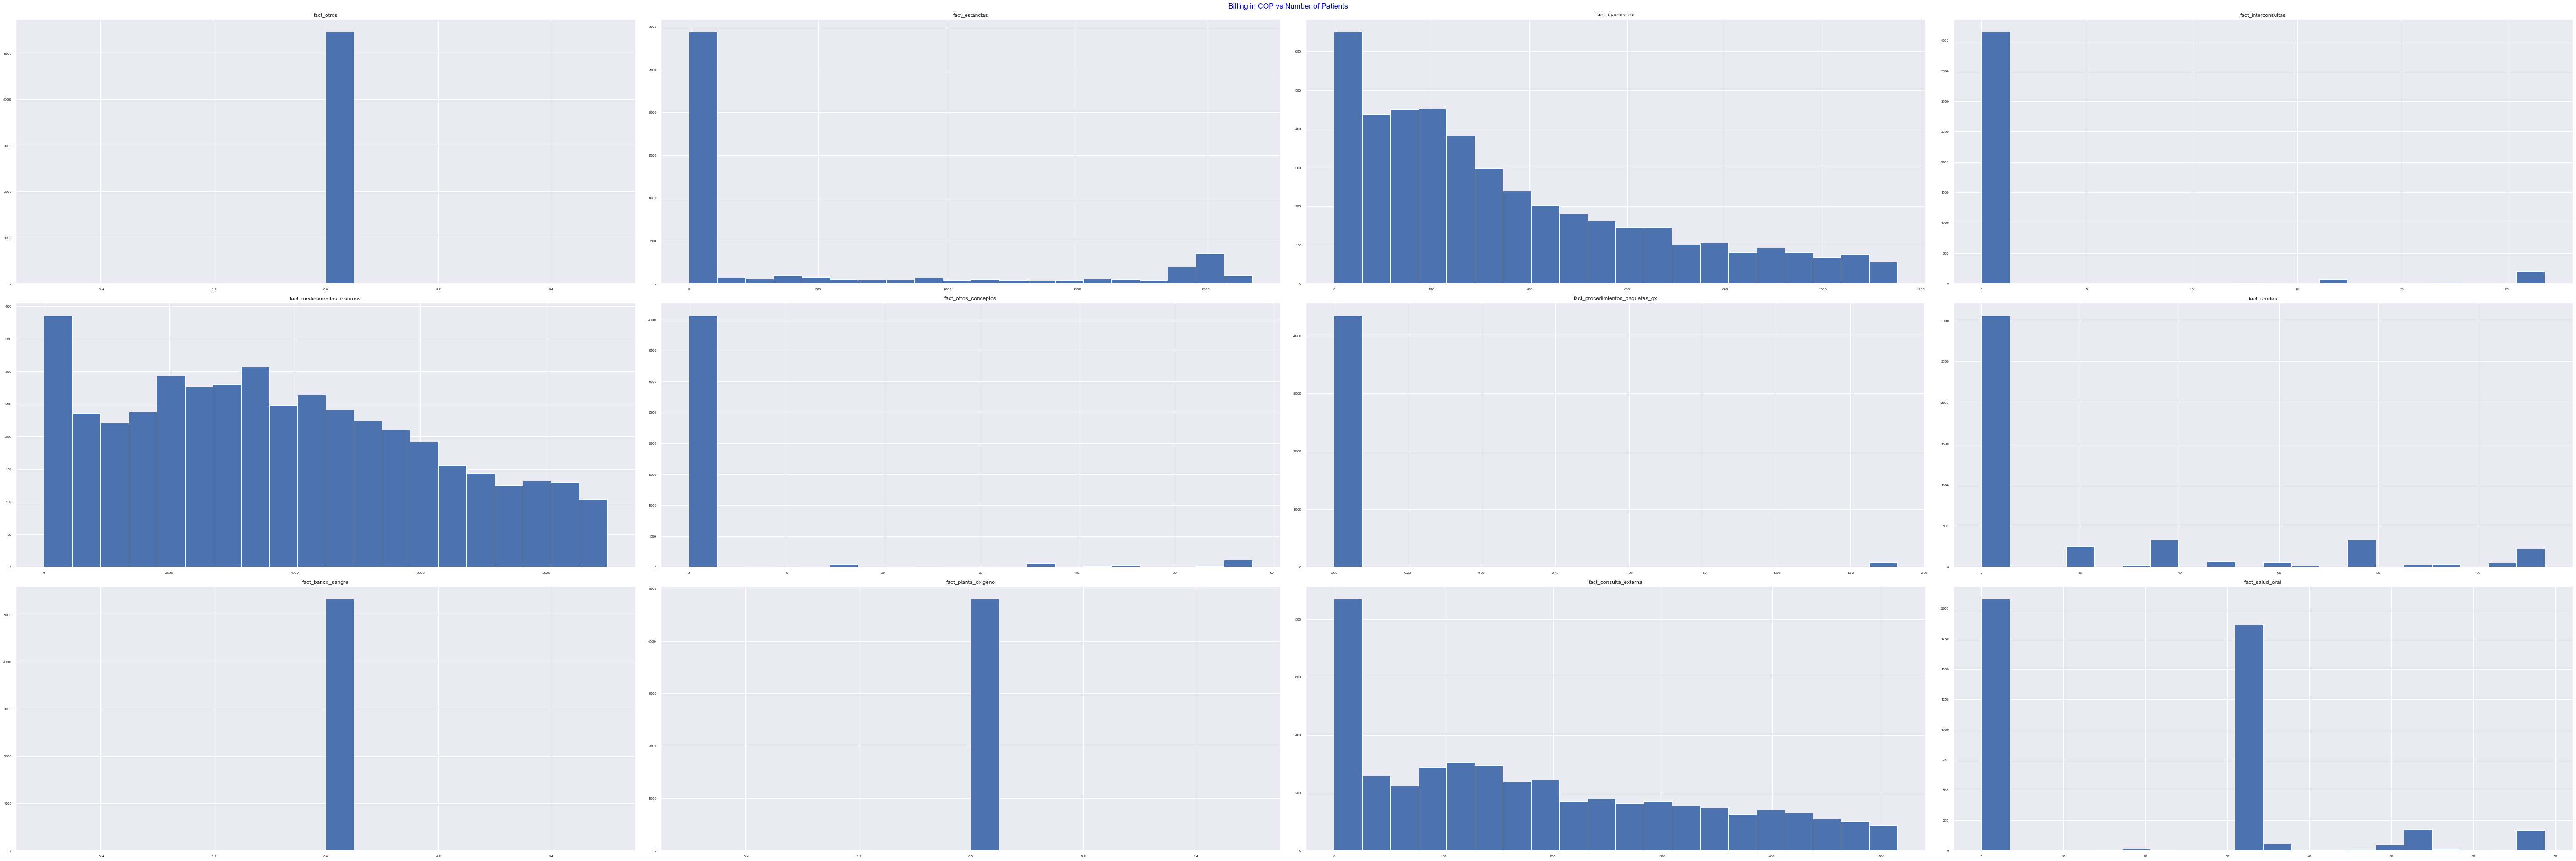

In [34]:
plt.figure()
fig, axs = plt.subplots(3,4, sharey= True, constrained_layout = True)
plt.yticks([])

for i in range (0,3):
    for j in range (0,4):
        axs[i, j].get_xaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (16,12)

for i in range (0,12):
    fig.add_subplot (3,4,i+1)
    _ = plt.hist(pluri_patients[billing_variables[i]]/1000 , bins=20,
                 range = (0, pluri_patients[billing_variables[i]].quantile(0.8)/1000) )
    plt.xticks( fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.title(billing_variables[i])
fig.suptitle('Billing in COP vs Number of Patients', fontsize=16, color = "mediumblue")

Drugs and  supplies billing as expected exhibits the larger amount and is skewed to the right. The billing stays amount presents a high concentration of values less than 100.000 COP but is influenced by extreme values. 
On the other hand, there are a group of billing variables close to 0 like fact_planta_oxigeno, fact_banco_sangre_fact_otros, etc. 

Let's see the correlation.

In [35]:
#Change estado_vital as boolean. Vivo = 0, fallecido =1
pluri_patients["estado_vital"] = pluri_patients["estado_vital"].replace("fallecido","1")
pluri_patients["estado_vital"] = pluri_patients["estado_vital"].replace("vivo","0")
pluri_patients["estado_vital"] = pd.to_numeric(pluri_patients["estado_vital"],errors = "coerce")
corr_billing = pluri_patients.loc[:,[ "estado_vital","fact_otros", "fact_estancias", "fact_ayudas_dx", "fact_interconsultas", "fact_medicamentos_insumos","fact_otros_conceptos", "fact_procedimientos_paquetes_qx", "fact_rondas", "fact_banco_sangre", "fact_planta_oxigeno", "fact_consulta_externa", "fact_salud_oral", "fact_total"]].corr()
corr_billing_def = corr_billing[["estado_vital"]]
corr_billing_def.style.background_gradient(cmap='coolwarm')

,estado_vital
estado_vital,1.000000
fact_otros,-0.002708
fact_estancias,0.229195
fact_ayudas_dx,0.185168
fact_interconsultas,0.226073
fact_medicamentos_insumos,0.069917
fact_otros_conceptos,0.051723
fact_procedimientos_paquetes_qx,0.057207
fact_rondas,0.212120
fact_banco_sangre,0.112176


There is not a strong correlation between the billing variables and the vital state of a person. But there are insteresting points:
- The year 2020 corresponds to the year where the covid 19 pandemic began in Colombia, this disease is characterized by respiratory problems and in severe cases hospitalization and oxygen supply, this can be the reason why the oxygen is the variable with the highest correlation to the vital state of a patient. 
- Besides oxygen and the relation with the vital state, the billing stays and medical rounds indicates patient hospitalization which implies poor health. Another variable is medical interconsultation for people that requiere the evaluation of a specialist. 
- The most influential variable in a patient's billing (medicines and supplies) does not have a correlation with the vital state because in most cases being under medicine treatment does not mean risk of death.

### Result of medic consults analysis

In this section we are going to make Exploratory Data Analysis with purpose of understand our data base indentifing characteristics of each variable, possible errors due to operational mistakes, calculate descriptive statistics and so on. Then we fixed some missing data with the purpose of having more accurate data, know data distributions and have important conclusions based on results of medic consults.

In [93]:
url = '../data/raw/pluri_patients_2020.csv'
df = pd.read_csv(url, sep = ';', decimal = ",")
df.head()

,edad,sexo,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,pancreatobiliar,glaucoma,hipertension,cerebrovascular,vertigo_y_alteraciones_auditivas,bradicardias_y_enfermedades_de_la_conduccion,otras_genitourinarias,depresion_y_alteraciones_del_animo,epoc,enfermedad_renal_cronica,enfermedades_de_la_tiroides,otras_enfermedades_digestivas,hematologicas,alteraciones_otorrinolaringologicas,obesidad,enfermedades_de_la_prostata,esquizofrenia,vascular_periferica,alteraciones_de_la_agudeza_visual,cromosomicas,osteoporosis,infecciones_cronicas,anemia,somatomorfos,otras_enfermedades_oculares,colitis_y_gastrointestinales_inferiores,artrosis,enfermedad_isquemica_cardiaca,otras_respiratorias,cataratas,hepatopatia_cronica,otras_neurologicas,otras_psiquiatricas,valvulares,otras_dermatologicas,autoinmunes,trastornos_del_sueño,enfermedad_venosa_y_linfatica,migraña_y_sindromes_faciales_dolorosos,dislipidemia,esclerosis_multiple,demencias,alergia,asma,ulceras,enfermedad_inflamatoria_intestinal,neuropatias_perifericas,epilepsia,artropatías_inflamatorias,lumbalgia_cronica,otras_enfermedades_cardiovasculares,parkinson,cancer,fibrilacion_auricular,diabetes,falla_cardiaca,gastrointestinales_superiores,fact_otros,fact_estancias,fact_ayudas_dx,fact_interconsultas,fact_medicamentos_insumos,fact_otros_conceptos,fact_procedimientos_paquetes_qx,fact_rondas,fact_banco_sangre,fact_planta_oxigeno,fact_consulta_externa,fact_salud_oral,fact_total,peso,talla,saturacion_oxigeno,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,constantes,mets_-índice_metabólico,vo2_-_máxima_cantidad_de_oxígeno,índice_de_fragilidad_groningen,calificacion_indicefragilidad,tiempo_segundos_monopodal,calificacion_apoyo_monopodal,tiempo_segundos_5metros,calificación_velocidad,indice_tobillo_brazo,diabetes_mellitus,tipo_diabetes_mellitus,es_insulinorequiriente,tiempo_con_el_diagnóstico,glicemia,hemoglobina_glicada,control_diabetes,tiene_hta,control_hta,tiempo_con_el_diagnóstico2,epoc_bodex,enfermedad_coronaria,insuficiencia_cardíaca,valvulopatía,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,cuantos_cigarrillos_día,años_de_consumo,lipoproteina,hdl,colesterol_total,trigliceridos,clasificación_de_framinghan,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,estadio_de_la_enfermedad_renal,microalbuminuria,tsh,clase_funcional,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg,úlcera_de_pie_diabético,estado_vital
0,29,F,1,1,0,3,9,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,196230.048,5.309190e+05,80375.9175,9604766.0,0.000,0.000,77335.395,0.000,0,523272.20357,124600,1.113750e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No calificado,NaN,No calificado,NaN,No calificado,No calificado,No,No aplica,No,NaN,NaN,NaN,No aplica,No,No aplica,NaN,No aplica,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No clasificado,NaN,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
1,67,F,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,2,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0.000,2.652300e+05,0.0000,2498254.0,0.000,0.000,19236.990,0.000,0,138130.00000,117500,3.038351e+06,60.0,149.0,96.0,54.0,101.0,40.0,70.0,50.0,125.0,78.0,78.0,1.0,0.0,4.4349,15.5221,2.0,Normal,15.0,Aceptable,6.0,Deficiente,No calificado,Si,II,No,7.0,151.09,7.88,controlada,No,No aplica,NaN,Leve,No,No,No,No,No,No,0.0,0.0,66.27,41.34,142.03,172.08,Bajo riesgo,0.86,60.13,Estadio 2,3.02,5.77,Clase funcional 2B,0.86,60.13,0.0,No,vivo
2,83,M,1,0,0,4,3,0,0,0,0,0,4,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0.000,0.000000e+00,0.0000,1698497.0,0.000,0.000,19236.990,0.000,0,455913.4071

Establishing parameters for graphs and figures

In [94]:
sns.set(rc={'figure.figsize':(6,5)}) #Stablish size for graphs generate with seaborn library 

We noticed some of the fields taken from the source had a decimal separator with ",". The way Pandas works it interpret the "." as decimal separators instead of ",", and that´s why we need to tell the pd.read_csv to take the decimals with "," to transform it into a format readable for Pandas

In [95]:
analysis_list = ["edad",
"peso",
"talla",
"saturacion_oxigeno",
"perímetro_muslo",
"perímetro_cintura",
"pliegue_triceps",
"pliegue_abdomen",
"pliegue_muslo",
"presión_arterial_sistólica",
"presión_arterial_diastólica",
"frecuencia_cardíaca_en_reposo",
"auto-calificacion_nivel_de_ejercicio",
"constantes",
"mets_-índice_metabólico",
"vo2_-_máxima_cantidad_de_oxígeno",
"índice_de_fragilidad_groningen",
"calificacion_indicefragilidad",
"tiempo_segundos_monopodal",
"calificacion_apoyo_monopodal",
"tiempo_segundos_5metros",
"calificación_velocidad",
"indice_tobillo_brazo",
"diabetes_mellitus",
"tipo_diabetes_mellitus",
"es_insulinorequiriente",
"tiempo_con_el_diagnóstico",
"control_diabetes",
"tiene_hta",
"control_hta",
"tiempo_con_el_diagnóstico2",
"epoc_bodex",
"enfermedad_coronaria",
"insuficiencia_cardíaca",
"valvulopatía",
"arritmia_o_paciente_con_dispositivo",
"sufre_de_alguna_enfermedad_cardiovascular",
"tabaquismo",
"cuantos_cigarrillos_día",
"años_de_consumo",
"clasificación_de_framinghan",
"estadio_de_la_enfermedad_renal",
"clase_funcional",
"úlcera_de_pie_diabético"
]

In [39]:
df = pluri_patients[analysis_list] 
df.head()

,edad,peso,talla,saturacion_oxigeno,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,constantes,mets_-índice_metabólico,vo2_-_máxima_cantidad_de_oxígeno,índice_de_fragilidad_groningen,calificacion_indicefragilidad,tiempo_segundos_monopodal,calificacion_apoyo_monopodal,tiempo_segundos_5metros,calificación_velocidad,indice_tobillo_brazo,diabetes_mellitus,tipo_diabetes_mellitus,es_insulinorequiriente,tiempo_con_el_diagnóstico,control_diabetes,tiene_hta,control_hta,tiempo_con_el_diagnóstico2,epoc_bodex,enfermedad_coronaria,insuficiencia_cardíaca,valvulopatía,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,cuantos_cigarrillos_día,años_de_consumo,clasificación_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,úlcera_de_pie_diabético
0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No calificado,NaN,No calificado,NaN,No calificado,No calificado,No,No aplica,No,NaN,No aplica,No,No aplica,NaN,No aplica,No,No,No,No,No,No,NaN,NaN,No clasificado,Estadio 0,No clasificado,No
1,67,"60,0",149.0,96.0,"54,0","101,0","40,0","70,0","50,0",125.0,78.0,78.0,1.0,"0,00","4,43490000000000e+00","15,5221",2.0,Normal,15.0,Aceptable,6.0,Deficiente,No calificado,Si,II,No,7.0,controlada,No,No aplica,NaN,Leve,No,No,No,No,No,No,0.0,0.0,Bajo riesgo,Estadio 2,Clase funcional 2B,No
2,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No calificado,NaN,No calificado,NaN,No calificado,No calificado,No,No aplica,No,NaN,No aplica,No,No aplica,NaN,No aplica,No,No,No,No,No,No,NaN,NaN,No clasificado,Estadio 0,No clasificado,No
3,66,"52,0",170.0,93.0,"35,0","75,0","2,0","2,0","2,0",110.0,58.0,64.0,1.0,"0,00","9,26170000000000e+00","32,4160",9.0,Frágil,0.0,Malo - Fragil,0.0,Malo - Frágil,No calificado,Si,II,Si,0.0,controlada,Si,Controlada,0.0,No aplica,No,Controlada,No,No,Si,No,0.0,0.0,Bajo riesgo,Estadio 3A,Clase funcional 4,No
4,62,"55,0",148.0,95.0,"45,0","87,0","1,0","20,0","20,0",135.0,74.0,83.0,1.0,"0,00","5,11130000000000e+00","17,8895",1.0,Normal,0.0,Malo - Fragil,8.0,Deficiente,No calificado,Si,II,Si,NaN,No controlada,Si,Controlada,NaN,Leve,No,No,No,Si,Si,No,0.0,NaN,Alto riesgo,Estadio 1,Clase funcional 2B,No


In [40]:
columns_english = [
"age",
"weight",
"size",
"oxygen_saturation",
"thigh_perimeter",
"waist_perimeter",
"triceps_fold",
"tummy_fold",
"thigh_fold",
"systolic_blood_pressure",
"diastolic_blood_pressure",
"resting_heart_rate",
"self-rating_exercise_level",
"constants",
"mets_-metabolic_rate",
"vo2_-_maximum_amount_of_oxygen",
"groningen_fragility_index",
"fragility_index_rating",
"monopodal_time_seconds",
"monopodal_support_qualification",
"time_seconds_5meters",
"speed_rating",
"ankle_arm_index",
"Mellitus diabetes",
"type_diabetes_mellitus",
"is_insulinrequired",
"time_with_diagnosis",
"control_diabetes",
"has_hta",
"control_hta",
"time_with_diagnosis2",
"epoc_bodex",
"coronary heart disease",
"heart failure",
"valvulopathy",
"arrhythmia_or_patient_with_device",
"suffer_from_some_cardiovascular_disease",
"smoking",
"how many_cigarettes_day",
"years_of_consumption",
"framinghan_classification",
"stage_of_kidney_disease",
"functional_class",
"diabetic_foot_ulcer"
]

In [41]:
len(analysis_list), len(columns_english) #Compare lenght of spanish and english list

(44, 44)

In [42]:
df.info() #Data type of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   edad                                       5511 non-null   int64  
 1   peso                                       4698 non-null   object 
 2   talla                                      4698 non-null   float64
 3   saturacion_oxigeno                         4682 non-null   float64
 4   perímetro_muslo                            4698 non-null   object 
 5   perímetro_cintura                          4698 non-null   object 
 6   pliegue_triceps                            4698 non-null   object 
 7   pliegue_abdomen                            4698 non-null   object 
 8   pliegue_muslo                              4698 non-null   object 
 9   presión_arterial_sistólica                 4698 non-null   float64
 10  presión_arterial_diastól

In [43]:
df.describe() #Generate basic statistics for whole data frame

,edad,talla,saturacion_oxigeno,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,índice_de_fragilidad_groningen,tiempo_segundos_monopodal,tiempo_segundos_5metros,tiempo_con_el_diagnóstico,tiempo_con_el_diagnóstico2,cuantos_cigarrillos_día,años_de_consumo
count,5511.000000,4698.000000,4682.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,1529.000000,2678.000000,4351.000000,4278.000000
mean,72.040646,156.294593,114.217642,128.989996,73.197105,76.069178,1.048106,4.805875,7.356535,4.393572,14.328973,16.572069,1.787175,3.619448
std,13.506609,9.774183,1374.409912,20.177668,11.102609,11.882672,0.386907,3.492653,10.125167,3.026154,52.225432,44.340321,6.197792,11.483308
min,18.000000,0.000000,0.000000,70.000000,40.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,150.000000,93.000000,117.000000,66.000000,68.000000,1.000000,1.000000,0.000000,0.000000,5.000000,10.000000,0.000000,0.000000
50%,73.000000,156.000000,95.000000,125.000000,72.000000,76.000000,1.000000,4.000000,2.000000,5.000000,10.000000,15.000000,0.000000,0.000000
75%,81.000000,162.000000,96.000000,140.000000,80.000000,83.000000,1.000000,8.000000,15.000000,6.000000,20.000000,20.000000,0.000000,0.000000
max,104.000000,188.000000,94138.000000,270.000000,138.000000,142.000000,5.000000,15.000000,210.000000,9.000000,2020.000000,2020.000000,60.000000,90.000000


Looking into the data we can see some low values for size and weight. Howevever, this could be derived from a medical condition or a very sick patient, also very high values for weight which could be an overweighted patient, therefore we will need to analyze both scenarios separately, for low and high values.

There are some points at "zero" which need to be deleted as there is no such person with size and weight equals to zero. Also there is one patient with "saturación de oxigeno" which is the percentage of hemoglobine in the blood on 0%. Therefore this could be a bad reading as normal values vary between 90% to 100%.

Also, there are some patients with a Heart Rate of 2 which will means it has 2 beats per minute, and it´s not possible or the person will be dead.

These cases could have more valuable information for other variables so we will not exlude them, instead we are going to replace the outliers values with nan.

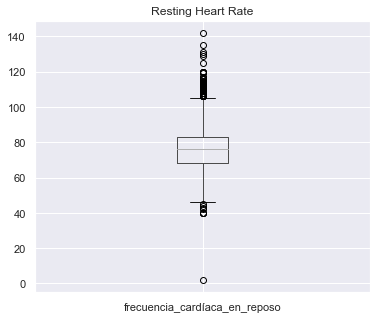

In [44]:
axes = df.boxplot(column = 'frecuencia_cardíaca_en_reposo') #Generate box plot for frecuencia cardíaca en reposo variable
axes.set_title('Resting Heart Rate');

In [45]:
df['frecuencia_cardíaca_en_reposo'].sort_values(ascending = True) 

3089     2.0
275     40.0
2825    40.0
896     40.0
4101    40.0
        ... 
5474     NaN
5484     NaN
5487     NaN
5488     NaN
5494     NaN
Name: frecuencia_cardíaca_en_reposo, Length: 5511, dtype: float64

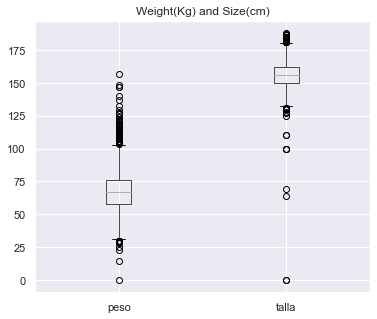

In [97]:
axes = df.boxplot(column = ['peso','talla'])
axes.set_title('Weight(Kg) and Size(cm)');

In [48]:
df[['edad','peso']].sort_values(by = 'peso', ascending = True).head(10) #First look at the relationship between edad and peso variables

,edad,peso
3782,85,"0,0"
4730,39,"100,0"
4836,51,"100,0"
336,78,"100,0"
3078,64,"100,0"
4392,79,"100,0"
5292,82,"100,0"
545,67,"100,0"
4383,57,"100,0"
3422,59,"100,0"


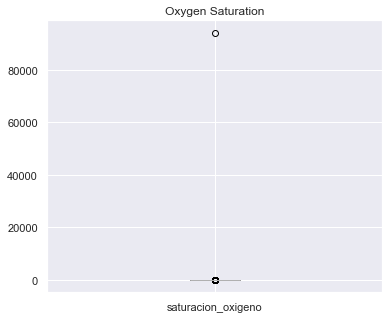

In [49]:
axes = df.boxplot(column = 'saturacion_oxigeno')
axes.set_title('Oxygen Saturation');

Oxygen Saturation is a percentage that goes from 0 to 100%. Therefore the we will replace those upper outliers with nan

In [50]:
df['saturacion_oxigeno'].min(), df['saturacion_oxigeno'].max()

(0.0, 94138.0)

In [98]:
df['talla'] = df['talla'].replace({0:np.nan})
df[df['frecuencia_cardíaca_en_reposo'] < 40] = np.nan #Replacing outliers less than 40
# beats per minute with nan values.
df[df['peso'] < 20] = np.nan #Removing outliers that are weights less than 20kg
df[df['saturacion_oxigeno'] > 100] = np.nan #max value should be 100%
df['saturacion_oxigeno'] = df['saturacion_oxigeno'].replace({94.150879:np.nan}) #Assign mean for nans in saturacion_oxigeno

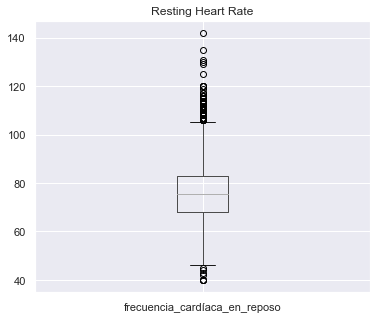

In [99]:
axes = df.boxplot(column = 'frecuencia_cardíaca_en_reposo')
axes.set_title('Resting Heart Rate');

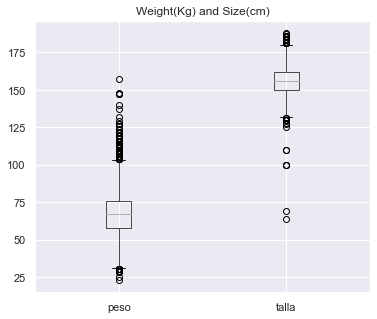

In [100]:
axes = df.boxplot(column = ['peso','talla'])
axes.set_title('Weight(Kg) and Size(cm)');

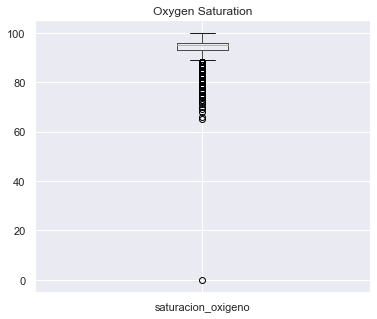

In [101]:
axes = df.boxplot(column = 'saturacion_oxigeno')
axes.set_title('Oxygen Saturation');

Normal Values of Oxygen Saturation are between 90% to 100%, however we will keep those lower values as could be patients with some affections to be analyzed.

Now that we have a cleaner dataset, we will continue exploring:

In [102]:
df.describe()

,edad,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,pancreatobiliar,glaucoma,hipertension,cerebrovascular,vertigo_y_alteraciones_auditivas,bradicardias_y_enfermedades_de_la_conduccion,otras_genitourinarias,depresion_y_alteraciones_del_animo,epoc,enfermedad_renal_cronica,enfermedades_de_la_tiroides,otras_enfermedades_digestivas,hematologicas,alteraciones_otorrinolaringologicas,obesidad,enfermedades_de_la_prostata,esquizofrenia,vascular_periferica,alteraciones_de_la_agudeza_visual,cromosomicas,osteoporosis,infecciones_cronicas,anemia,somatomorfos,otras_enfermedades_oculares,colitis_y_gastrointestinales_inferiores,artrosis,enfermedad_isquemica_cardiaca,otras_respiratorias,cataratas,hepatopatia_cronica,otras_neurologicas,otras_psiquiatricas,valvulares,otras_dermatologicas,autoinmunes,trastornos_del_sueño,enfermedad_venosa_y_linfatica,migraña_y_sindromes_faciales_dolorosos,dislipidemia,esclerosis_multiple,demencias,alergia,asma,ulceras,enfermedad_inflamatoria_intestinal,neuropatias_perifericas,epilepsia,artropatías_inflamatorias,lumbalgia_cronica,otras_enfermedades_cardiovasculares,parkinson,cancer,fibrilacion_auricular,diabetes,falla_cardiaca,gastrointestinales_superiores,fact_otros,fact_estancias,fact_ayudas_dx,fact_interconsultas,fact_medicamentos_insumos,fact_otros_conceptos,fact_procedimientos_paquetes_qx,fact_rondas,fact_banco_sangre,fact_planta_oxigeno,fact_consulta_externa,fact_salud_oral,fact_total,peso,talla,saturacion_oxigeno,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,constantes,mets_-índice_metabólico,vo2_-_máxima_cantidad_de_oxígeno,índice_de_fragilidad_groningen,tiempo_segundos_monopodal,tiempo_segundos_5metros,tiempo_con_el_diagnóstico,glicemia,hemoglobina_glicada,tiempo_con_el_diagnóstico2,cuantos_cigarrillos_día,años_de_consumo,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
count,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.00000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,5.507000e+03,4694.000000,4693.000000,4678.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,1528.000000,4348.000000,4348.000000,2675.000000,4347.000000,4274.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,72.040857,0.359179,0.585618,0.106955,1.360450,3.471945,1.699837,0.096241,0.142727,0.001453,0.014709,1.900127,0.222263,0.066098,0.009987,0.087525,0.474669,0.520065,0.286726,0.268023,0.006174,0.010169,0.025422,0.166697,0.063192,0.055929,0.011985,0.00345,0.003269,0.152533,0.019793,0.043944,0.293082,0.007445,0.074451,0.295079,0.400944,0.008535,0.002905,0.033412,0.081351,0.109679,0.036499,0.018885,0.084801,0.121845,0.082077,0.095696,

There are some variables that have a big difference between the 3rd Quartile and the Max, therefore we will see percentile 90 for all the variables.

In [103]:
df.quantile(.9)

edad                                  88.000
n_urg                                  1.000
n_hosp                                 2.000
n_cx                                   0.000
n_ce_med_general                       4.000
                                       ...  
microalbuminuria                      47.883
tsh                                    5.379
creatinina_2_consulta                  1.330
tasa_de_filtración_glomerular_tfg3    92.045
cambio_de_tfg                          0.160
Name: 0.9, Length: 114, dtype: float64

We see some big differences between percentile 90 and the max for: perímetro_muslo, pliegue_triceps, pliegue_abdomen, tiempo_segundos_monopodal, tiempo_en_el_diagnostico and años_de_consumo so we are going to look deeper if this is due to outliers that need to be removed as well

In [104]:
df['tiempo_con_el_diagnóstico'].sort_values(ascending = False)

3792    2020.0
4476      60.0
1919      56.0
1643      50.0
1261      50.0
         ...  
5506       NaN
5507       NaN
5508       NaN
5509       NaN
5510       NaN
Name: tiempo_con_el_diagnóstico, Length: 5511, dtype: float64

In [105]:
df['tiempo_con_el_diagnóstico2'].sort_values(ascending = False)

3792    2020.0
620     1020.0
3975      60.0
1365      54.0
4084      51.0
         ...  
5501       NaN
5505       NaN
5506       NaN
5509       NaN
5510       NaN
Name: tiempo_con_el_diagnóstico2, Length: 5511, dtype: float64

We have very clear outliers to eliminate here

In [106]:
df[df['tiempo_con_el_diagnóstico']>100] = np.nan
df[df['tiempo_con_el_diagnóstico2']>100] = np.nan
df['tiempo_con_el_diagnóstico'].max(),df['tiempo_con_el_diagnóstico2'].max()

(60.0, 60.0)

Continue with the rest of variables:

In [107]:
df['started_consuming'] = df['edad'] - df['años_de_consumo']
df[['edad','años_de_consumo','started_consuming']].sort_values(by = 'años_de_consumo',ascending = False).head(10)

,edad,años_de_consumo,started_consuming
4299,85.0,90.0,-5.0
5268,92.0,80.0,12.0
4904,84.0,72.0,12.0
2345,81.0,70.0,11.0
4777,85.0,70.0,15.0
993,84.0,70.0,14.0
2365,94.0,70.0,24.0
4772,84.0,70.0,14.0
3172,85.0,70.0,15.0
1660,101.0,70.0,31.0


In [108]:
df[df['started_consuming']<10][['edad','años_de_consumo','started_consuming']]

,edad,años_de_consumo,started_consuming
3285,65.0,58.0,7.0
4299,85.0,90.0,-5.0
5199,74.0,68.0,6.0
5226,68.0,60.0,8.0
5294,73.0,65.0,8.0


We created another column call "started_consuming" to understand according to the data at what age did the person start to consume tobacco. We found some discrepancies as a negative age (year of consumption are higher that the age) and also some information that say that some patients started consuming tobacco with less than 10 years old, which is very unlikely. For that reason, we will remove the age of consumption (años_de_consumo) for those patients from our dataset.

In [109]:
index_list = (df[df['started_consuming']<10]['años_de_consumo'].index)
index_list

Int64Index([3285, 4299, 5199, 5226, 5294], dtype='int64')

In [110]:
df['años_de_consumo'].iloc[index_list] = np.nan

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\2983533410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['años_de_consumo'].iloc[index_list] = np.nan


In [111]:
df[df['started_consuming']<10][['edad','años_de_consumo','started_consuming']]

,edad,años_de_consumo,started_consuming
3285,65.0,NaN,7.0
4299,85.0,NaN,-5.0
5199,74.0,NaN,6.0
5226,68.0,NaN,8.0
5294,73.0,NaN,8.0


Let´s continue with the last two variables of anaylis:

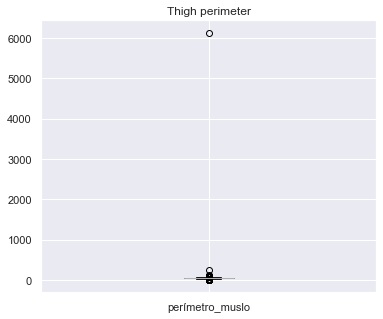

In [112]:
axes = df.boxplot(column = 'perímetro_muslo')
axes.set_title('Thigh perimeter');

In [113]:
df['perímetro_muslo'].sort_values(ascending=False)

1937    6124.0
2140     251.0
629      125.0
2055     100.0
2076      95.0
         ...  
5474       NaN
5484       NaN
5487       NaN
5488       NaN
5494       NaN
Name: perímetro_muslo, Length: 5511, dtype: float64

Values higher than 200 mm are not that normal, se cleaned it out:

Source: https://scialert.net/fulltext/?doi=pjbs.2019.168.173#:~:text=The%20visceral%20fat%20area%20considered,female%20was%20considered%20as%20normal.

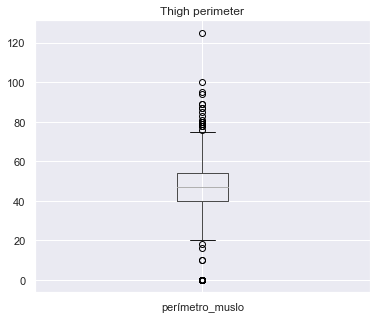

In [114]:
df[df['perímetro_muslo'] > 200] = np.nan
axes = df.boxplot(column = 'perímetro_muslo')
axes.set_title('Thigh perimeter');

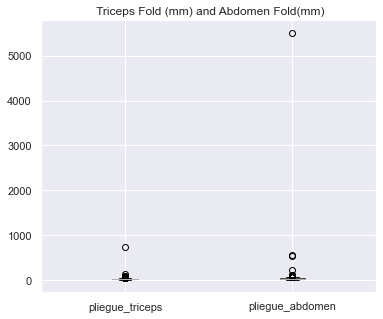

In [115]:
axes = df.boxplot(column = ['pliegue_triceps','pliegue_abdomen'])
axes.set_title(' Triceps Fold (mm) and Abdomen Fold(mm)');

In [71]:
df['pliegue_triceps'].sort_values(ascending=False).head(10)

838     95,0
802      9,0
2937     9,0
3511     9,0
4932     9,0
3489     9,0
3400     9,0
388      9,0
3088     9,0
3023     9,0
Name: pliegue_triceps, dtype: object

In [72]:
df['pliegue_abdomen'].sort_values(ascending=False).head(10)

745     93,0
417     90,0
4248    90,0
2700    90,0
5146    90,0
686      9,0
2025     9,0
1967     9,0
113      9,0
953      9,0
Name: pliegue_abdomen, dtype: object

Values outside the normal range. For Abdomen more than 100 for male and more than 80 for female. Value over 120 will be changed to nan

More info here:

https://scialert.net/fulltext/?doi=pjbs.2019.168.173#:~:text=The%20visceral%20fat%20area%20considered,female%20was%20considered%20as%20normal.

Regarding the Triceps Fold, for Boys and Girls is normal to be 30 mm or less, so for an adult person can be even higher. Folds higher than 80 mm will be turned into nan.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083983/

In [116]:
df[df['pliegue_triceps']>80] = np.nan
df[df['pliegue_abdomen'] > 120] = np.nan

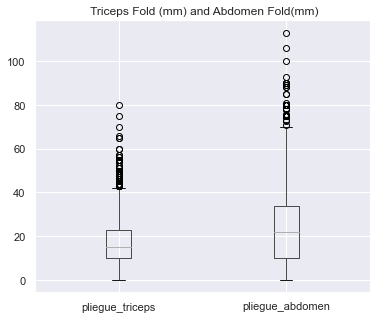

In [117]:
axes = df.boxplot(column = ['pliegue_triceps','pliegue_abdomen'])
axes.set_title(' Triceps Fold (mm) and Abdomen Fold(mm)');

Now after cleaning data, we will start with more exploratory data analysis:

In [75]:
df.describe() #New cleaned data

,edad,talla,saturacion_oxigeno,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,índice_de_fragilidad_groningen,tiempo_segundos_monopodal,tiempo_segundos_5metros,tiempo_con_el_diagnóstico,tiempo_con_el_diagnóstico2,cuantos_cigarrillos_día,años_de_consumo,started_consuming
count,5508.000000,4693.000000,4679.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,1527.000000,2676.000000,4348.000000,4270.000000,4275.000000
mean,72.040850,156.360963,114.230819,128.995740,73.195740,76.086475,1.048136,4.803195,7.359105,4.394462,13.011788,15.448430,1.786109,3.546370,69.108772
std,13.506166,9.229185,1374.850447,20.181779,11.104772,11.836416,0.387029,3.491976,10.127190,3.025015,9.653763,9.455926,6.198560,11.272102,17.784603
min,18.000000,64.000000,0.000000,70.000000,40.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,65.000000,150.000000,93.000000,117.000000,66.000000,68.000000,1.000000,1.000000,0.000000,0.000000,5.000000,10.000000,0.000000,0.000000,62.000000
50%,73.000000,156.000000,95.000000,125.000000,72.000000,76.000000,1.000000,4.000000,2.000000,5.000000,10.000000,15.000000,0.000000,0.000000,72.000000
75%,81.000000,162.000000,96.000000,140.000000,80.000000,83.000000,1.000000,8.000000,15.000000,6.000000,20.000000,20.000000,0.000000,0.000000,81.000000
max,104.000000,188.000000,94138.000000,270.000000,138.000000,142.000000,5.000000,15.000000,210.000000,9.000000,60.000000,60.000000,60.000000,80.000000,104.000000


Looking deeper to started consuming variable we notice that there are some outliers that affects our analysis, for example if we look at minimun value this is negative and by other hand probability to start smoking at 104 age as maximum value is showing is not commun.

In [76]:
df.head()

,edad,peso,talla,saturacion_oxigeno,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,constantes,mets_-índice_metabólico,vo2_-_máxima_cantidad_de_oxígeno,índice_de_fragilidad_groningen,calificacion_indicefragilidad,tiempo_segundos_monopodal,calificacion_apoyo_monopodal,tiempo_segundos_5metros,calificación_velocidad,indice_tobillo_brazo,diabetes_mellitus,tipo_diabetes_mellitus,es_insulinorequiriente,tiempo_con_el_diagnóstico,control_diabetes,tiene_hta,control_hta,tiempo_con_el_diagnóstico2,epoc_bodex,enfermedad_coronaria,insuficiencia_cardíaca,valvulopatía,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,cuantos_cigarrillos_día,años_de_consumo,clasificación_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,úlcera_de_pie_diabético,started_consuming
0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No calificado,NaN,No calificado,NaN,No calificado,No calificado,No,No aplica,No,NaN,No aplica,No,No aplica,NaN,No aplica,No,No,No,No,No,No,NaN,NaN,No clasificado,Estadio 0,No clasificado,No,NaN
1,67.0,"60,0",149.0,96.0,"54,0","101,0","40,0","70,0","50,0",125.0,78.0,78.0,1.0,"0,00","4,43490000000000e+00","15,5221",2.0,Normal,15.0,Aceptable,6.0,Deficiente,No calificado,Si,II,No,7.0,controlada,No,No aplica,NaN,Leve,No,No,No,No,No,No,0.0,0.0,Bajo riesgo,Estadio 2,Clase funcional 2B,No,67.0
2,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No calificado,NaN,No calificado,NaN,No calificado,No calificado,No,No aplica,No,NaN,No aplica,No,No aplica,NaN,No aplica,No,No,No,No,No,No,NaN,NaN,No clasificado,Estadio 0,No clasificado,No,NaN
3,66.0,"52,0",170.0,93.0,"35,0","75,0","2,0","2,0","2,0",110.0,58.0,64.0,1.0,"0,00","9,26170000000000e+00","32,4160",9.0,Frágil,0.0,Malo - Fragil,0.0,Malo - Frágil,No calificado,Si,II,Si,0.0,controlada,Si,Controlada,0.0,No aplica,No,Controlada,No,No,Si,No,0.0,0.0,Bajo riesgo,Estadio 3A,Clase funcional 4,No,66.0
4,62.0,"55,0",148.0,95.0,"45,0","87,0","1,0","20,0","20,0",135.0,74.0,83.0,1.0,"0,00","5,11130000000000e+00","17,8895",1.0,Normal,0.0,Malo - Fragil,8.0,Deficiente,No calificado,Si,II,Si,NaN,No controlada,Si,Controlada,NaN,Leve,No,No,No,Si,Si,No,0.0,NaN,Alto riesgo,Estadio 1,Clase funcional 2B,No,NaN


Distribution of weight among all patients. Most of them, are between 60 and 80KG

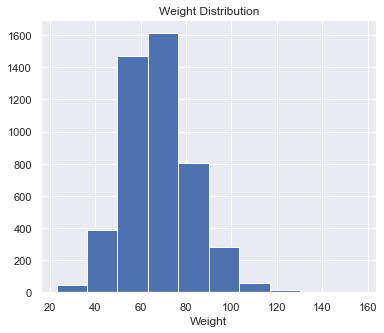

In [118]:
axes = df['peso'].hist()
axes.set_title('Weight Distribution')
axes.set_xlabel('Weight');

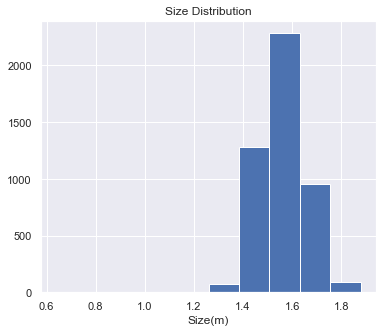

In [119]:
#Size in meters
df['talla'] = df['talla']/100
axes = df['talla'].hist()
axes.set_title('Size Distribution')
axes.set_xlabel('Size(m)');

Body Mass Index: BMI = Weight(kg) / [Size(m)] 2

In [120]:
df['BMI'] = df['peso'] / (df['talla']*df['talla'])
df[['peso','talla','BMI']]

,peso,talla,BMI
0,NaN,NaN,NaN
1,60.0,1.49,27.025810
2,NaN,NaN,NaN
3,52.0,1.70,17.993080
4,55.0,1.48,25.109569
...,...,...,...
5506,79.0,1.65,29.017447
5507,58.0,1.52,25.103878
5508,62.0,1.35,34.019204
5509,42.1,1.50,18.711111


Creating Bins for BMI Distribution:

Note: If BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

In [121]:
labels = ['Underweight','Normal or Helathy Weight','Overweight','Obese']
df['bin'] = pd.cut(df['BMI'], [10,18.5,24.9,29.9,100], labels = labels)
df[['BMI','bin']]

,BMI,bin
0,NaN,NaN
1,27.025810,Overweight
2,NaN,NaN
3,17.993080,Underweight
4,25.109569,Overweight
...,...,...
5506,29.017447,Overweight
5507,25.103878,Overweight
5508,34.019204,Obese
5509,18.711111,Normal or Helathy Weight


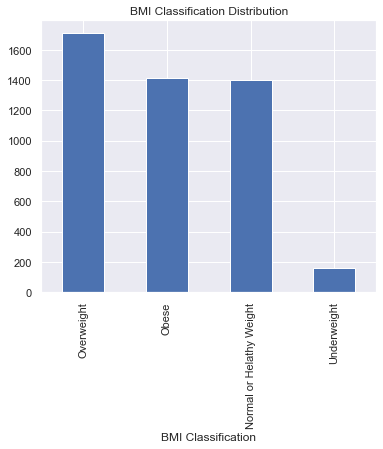

In [122]:
axes = df['bin'].value_counts().plot.bar() #Creates bar plot for BMI classifications
axes.set_title('BMI Classification Distribution')
axes.set_xlabel('BMI Classification');

Based on BMI classification shown in previous chart we can conclude that people located in normal or healthy weight is a short portion from overall population.

In [82]:
df.corr() #Creates correlation matrix 

,edad,talla,saturacion_oxigeno,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,índice_de_fragilidad_groningen,tiempo_segundos_monopodal,tiempo_segundos_5metros,tiempo_con_el_diagnóstico,tiempo_con_el_diagnóstico2,cuantos_cigarrillos_día,años_de_consumo,started_consuming
edad,1.000000,-0.110936,0.005340,0.030236,-0.162590,-0.143688,0.081853,0.199975,-0.229403,0.050324,0.063893,0.134615,-0.032314,-0.001137,0.763429
talla,-0.110936,1.000000,-0.019521,-0.118177,0.082825,-0.031452,-0.037915,0.041357,0.042027,-0.087845,0.025019,-0.061179,0.081530,0.080586,-0.137321
saturacion_oxigeno,0.005340,-0.019521,1.000000,0.006651,-0.011873,0.014490,-0.001958,-0.007591,-0.010509,-0.001860,0.040360,-0.002954,-0.004450,-0.004899,0.007398
presión_arterial_sistólica,0.030236,-0.118177,0.006651,1.000000,0.535820,0.026155,-0.006520,-0.201341,0.068664,0.131566,0.006609,0.037052,0.030041,-0.006082,0.014499
presión_arterial_diastólica,-0.162590,0.082825,-0.011873,0.535820,1.000000,0.188280,0.035628,-0.005357,0.041603,0.042716,-0.100724,-0.033551,0.084081,0.050993,-0.162942
frecuencia_cardíaca_en_reposo,-0.143688,-0.031452,0.014490,0.026155,0.188280,1.000000,0.014112,-0.055254,0.034911,0.010774,-0.040951,-0.020483,0.042274,0.046237,-0.136797
auto-calificacion_nivel_de_ejercicio,0.081853,-0.037915,-0.001958,-0.006520,0.035628,0.014112,1.000000,0.084723,-0.031044,0.016350,0.052348,0.015417,-0.003377,0.004690,0.062078
índice_de_fragilidad_groningen,0.199975,0.041357,-0.007591,-0.201341,-0.005357,-0.055254,0.084723,1.000000,-0.512543,-0.276833,0.008241,-0.070476,0.025727,0.037612,0.136481
tiempo_segundos_monopodal,-0.229403,0.042027,-0.010509,0.068664,0.041603,0.034911,-0.031044,-0.512543,1.000000,0.151807,-0.014903,0.030938,-0.014683,-0.012764,-0.165661
tiempo_segundos_5metros,0.050324,-0.087845,-0.001860,0.131566,0.042716,0.010774,0.016350,-0.276833,0.151807,1.000000,0.001889,0.037707,0.008814,-0.005943,0.045001


In [83]:
corr = df.corr()

<AxesSubplot:>

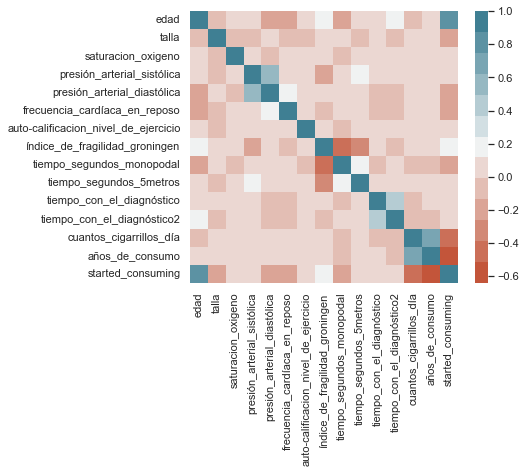

In [84]:
my_palette = sns.diverging_palette(20, 220, n= 13)

sns.heatmap(data = corr, cmap= sns.diverging_palette(20, 220, n= 13))

Looking at correlation chart we observe that there is a positive correlation between talla and indice metabolico and negative correlation perimetro de muslo and indice de fragilidad groginen.

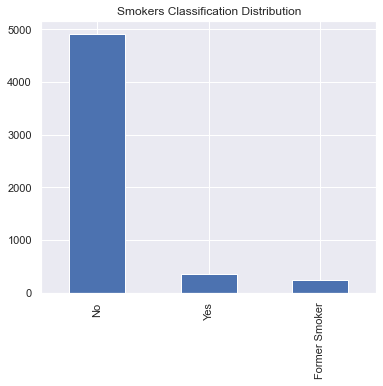

In [123]:
dict_label_changes = {'Si': 'Yes',
                      'No': 'No',
                      'Ex-fumador' : 'Former Smoker'
                      }
df['tabaquismo'] = df['tabaquismo'].map(dict_label_changes)
axes = df['tabaquismo'].value_counts().plot.bar()
axes.set_title('Smokers Classification Distribution'); #Creates bar plot distribution gruped by Smokers classification

This shows that 36% of the patients suffer a heart dissease, however it seems that is not directed related with Tobacco consumption as only 2.8% out of that 36% smoke. Also approximately 63% of patients don´t have a heart disease and of those, the 57.7% don´t consume tobbacco.

In [124]:
pd.crosstab(index= df['sufre_de_alguna_enfermedad_cardiovascular'],columns = df['tabaquismo'] #Creates pivot table for relationship between "sufre_de_alguna_enfermedad_cardiovascular" and "tabaquismo"
            , margins = True).apply(lambda x: x/len(df), axis=1) 

tabaquismo,Former Smoker,No,Yes,All
sufre_de_alguna_enfermedad_cardiovascular,,,,
No,0.020323,0.577935,0.034839,0.633097
Si,0.021230,0.314099,0.028851,0.364181
All,0.041553,0.892034,0.063691,0.997278


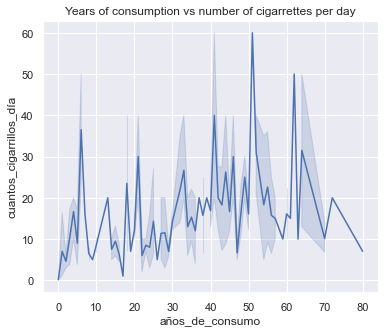

In [125]:
sns.lineplot(x = df['años_de_consumo'], y = df['cuantos_cigarrillos_día']).set(title='Years of consumption vs number of cigarrettes per day'); #Creates line plot for relationship between "cigarrillos al día" and "años de consumo"

Looking at previous chart we notice that trend throughout age for people seem to be horizontal, just it is a peek at 50 years where consume goes to the top for 60 cigarrettes per day. Lowest points is located at 18 years and from this point increase constantly.

CONCLUSIONS

As we saw in the EDA analysis one of the basic thing to correct is related to variable format in the way to get a better performance in variable selection.

We see that some variables requires a deeper analysis in order of correct possible data errors such as smokers descriptive statistics.

Based on interesting variables such us "peso", "muerte" and "smoke" could be an interesting relationship to determined dead cases that we could determined in further analysis based on these variables relationship.


### Basic EDA for variables related to medical exams results

In this notebook basic exploratory data analysis will be performed for the followings set of variables: 

| **Name**                               | **Description**                                           |
| :------------------------------------: | :-------------------------------------------------------: |
| ``glicemia``                           | Glycemia [mg ∙ dL-1]                                      |
| ``hemoglobina_glicada``                | Glycated hemoglobin [%]                           |
| ``lipoproteina``                       | Lipoprotein [mg ∙ dL-1]                                   |
| ``hdl``                                | High-density cholesterol [mg ∙ dL-1]                      |
| ``colesterol_total``                   | Total cholesterol [mg ∙ dL-1]                             |
| ``trigliceridos``                      | Triglycerides [mg ∙ dL-1]                                 |
| ``creatinina_1_consulta``              | Creatinin in the first medical appointment  [mg ∙ dL-1]   |
| ``tasa_de_filtración_glomerular_tfg``  | First measure of glomerular filtration rate [mL ∙ min-1]  |
| ``microalbuminuria``                   | Microalbuminuria [mg]                                     |
| ``tsh``                                | Thyroid-stimulating hormone [mU ∙ L-1]                    |
| ``creatinina_2_consulta``              | Creatinin in the second medical appointment  [mg ∙ dL-1]  |
| ``tasa_de_filtración_glomerular_tfg3`` | Second measure of glomerular filtration rate [mL ∙ min-1] |
| ``cambio_de_tfg``                      | Change in glomerular filtration rate [mL ∙ min-1]         |


Loading full dataset:

In [92]:
df = pd.read_csv('../data/raw/pluri_patients_2020.csv', sep = ';', decimal = ',')
df.head()

,edad,sexo,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,pancreatobiliar,glaucoma,hipertension,cerebrovascular,vertigo_y_alteraciones_auditivas,bradicardias_y_enfermedades_de_la_conduccion,otras_genitourinarias,depresion_y_alteraciones_del_animo,epoc,enfermedad_renal_cronica,enfermedades_de_la_tiroides,otras_enfermedades_digestivas,hematologicas,alteraciones_otorrinolaringologicas,obesidad,enfermedades_de_la_prostata,esquizofrenia,vascular_periferica,alteraciones_de_la_agudeza_visual,cromosomicas,osteoporosis,infecciones_cronicas,anemia,somatomorfos,otras_enfermedades_oculares,colitis_y_gastrointestinales_inferiores,artrosis,enfermedad_isquemica_cardiaca,otras_respiratorias,cataratas,hepatopatia_cronica,otras_neurologicas,otras_psiquiatricas,valvulares,otras_dermatologicas,autoinmunes,trastornos_del_sueño,enfermedad_venosa_y_linfatica,migraña_y_sindromes_faciales_dolorosos,dislipidemia,esclerosis_multiple,demencias,alergia,asma,ulceras,enfermedad_inflamatoria_intestinal,neuropatias_perifericas,epilepsia,artropatías_inflamatorias,lumbalgia_cronica,otras_enfermedades_cardiovasculares,parkinson,cancer,fibrilacion_auricular,diabetes,falla_cardiaca,gastrointestinales_superiores,fact_otros,fact_estancias,fact_ayudas_dx,fact_interconsultas,fact_medicamentos_insumos,fact_otros_conceptos,fact_procedimientos_paquetes_qx,fact_rondas,fact_banco_sangre,fact_planta_oxigeno,fact_consulta_externa,fact_salud_oral,fact_total,peso,talla,saturacion_oxigeno,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,presión_arterial_sistólica,presión_arterial_diastólica,frecuencia_cardíaca_en_reposo,auto-calificacion_nivel_de_ejercicio,constantes,mets_-índice_metabólico,vo2_-_máxima_cantidad_de_oxígeno,índice_de_fragilidad_groningen,calificacion_indicefragilidad,tiempo_segundos_monopodal,calificacion_apoyo_monopodal,tiempo_segundos_5metros,calificación_velocidad,indice_tobillo_brazo,diabetes_mellitus,tipo_diabetes_mellitus,es_insulinorequiriente,tiempo_con_el_diagnóstico,glicemia,hemoglobina_glicada,control_diabetes,tiene_hta,control_hta,tiempo_con_el_diagnóstico2,epoc_bodex,enfermedad_coronaria,insuficiencia_cardíaca,valvulopatía,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,cuantos_cigarrillos_día,años_de_consumo,lipoproteina,hdl,colesterol_total,trigliceridos,clasificación_de_framinghan,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,estadio_de_la_enfermedad_renal,microalbuminuria,tsh,clase_funcional,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg,úlcera_de_pie_diabético,estado_vital
0,29,F,1,1,0,3,9,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,196230.048,5.309190e+05,80375.9175,9604766.0,0.000,0.000,77335.395,0.000,0,523272.20357,124600,1.113750e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No calificado,NaN,No calificado,NaN,No calificado,No calificado,No,No aplica,No,NaN,NaN,NaN,No aplica,No,No aplica,NaN,No aplica,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No clasificado,NaN,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
1,67,F,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,2,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0.000,2.652300e+05,0.0000,2498254.0,0.000,0.000,19236.990,0.000,0,138130.00000,117500,3.038351e+06,60.0,149.0,96.0,54.0,101.0,40.0,70.0,50.0,125.0,78.0,78.0,1.0,0.0,4.4349,15.5221,2.0,Normal,15.0,Aceptable,6.0,Deficiente,No calificado,Si,II,No,7.0,151.09,7.88,controlada,No,No aplica,NaN,Leve,No,No,No,No,No,No,0.0,0.0,66.27,41.34,142.03,172.08,Bajo riesgo,0.86,60.13,Estadio 2,3.02,5.77,Clase funcional 2B,0.86,60.13,0.0,No,vivo
2,83,M,1,0,0,4,3,0,0,0,0,0,4,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0.000,0.000000e+00,0.0000,1698497.0,0.000,0.000,19236.990,0.000,0,455913.4071

In [126]:
df.shape

(5511, 140)

Defining a subset whit the variables of interest: 

In [127]:
variable_list = ['glicemia', 
'hemoglobina_glicada', 
'lipoproteina', 
'hdl', 
'colesterol_total', 
'trigliceridos', 
'creatinina_1_consulta', 
'tasa_de_filtración_glomerular_tfg', 
'microalbuminuria', 
'tsh', 
'creatinina_2_consulta', 
'tasa_de_filtración_glomerular_tfg3', 
'cambio_de_tfg']

sub_df = df.loc[:, df.columns.isin(variable_list)]
sub_df.head()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,151.09,7.88,66.27,41.34,142.03,172.08,0.86,60.13,3.02,5.77,0.86,60.13,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.10,6.60,0.00,35.10,97.50,74.00,0.92,58.09,7.00,1.17,0.00,0.00,0.0
4,243.00,9.61,84.78,40.00,142.00,84.00,0.47,107.76,68.00,2.89,0.00,0.00,0.0


In [128]:
sub_df.shape

(5511, 13)

Exploring values, type of data anda basic statistics in the subset: 

In [129]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   glicemia                            4337 non-null   float64
 1   hemoglobina_glicada                 4337 non-null   float64
 2   lipoproteina                        4337 non-null   float64
 3   hdl                                 4337 non-null   float64
 4   colesterol_total                    4337 non-null   float64
 5   trigliceridos                       4337 non-null   float64
 6   creatinina_1_consulta               4337 non-null   float64
 7   tasa_de_filtración_glomerular_tfg   4337 non-null   float64
 8   microalbuminuria                    4337 non-null   float64
 9   tsh                                 4337 non-null   float64
 10  creatinina_2_consulta               4337 non-null   float64
 11  tasa_de_filtración_glomerular_tfg3  4337 no

In [130]:
sub_df.isna().sum()

glicemia                              1174
hemoglobina_glicada                   1174
lipoproteina                          1174
hdl                                   1174
colesterol_total                      1174
trigliceridos                         1174
creatinina_1_consulta                 1174
tasa_de_filtración_glomerular_tfg     1174
microalbuminuria                      1174
tsh                                   1174
creatinina_2_consulta                 1174
tasa_de_filtración_glomerular_tfg3    1174
cambio_de_tfg                         1174
dtype: int64

In [131]:
_ = [print(x, ": ", sub_df[x].sort_values().unique(), "\n") for x in sub_df.columns]

glicemia :  [  0.     1.07   1.13 ... 990.   993.      nan] 

hemoglobina_glicada :  [  0.      3.      4.      4.11    4.19    4.33    4.4     4.41    4.5
   4.64    4.7     4.73    4.79    4.8     4.83    4.85    4.89    4.9
   4.91    4.92    4.93    4.94    4.98    4.99    5.      5.01    5.02
   5.03    5.04    5.05    5.06    5.07    5.08    5.09    5.1     5.11
   5.12    5.13    5.15    5.16    5.18    5.19    5.2     5.21    5.22
   5.23    5.24    5.25    5.26    5.27    5.28    5.29    5.3     5.31
   5.32    5.33    5.34    5.35    5.36    5.37    5.38    5.39    5.4
   5.41    5.42    5.43    5.44    5.45    5.46    5.47    5.48    5.49
   5.5     5.51    5.52    5.53    5.54    5.55    5.56    5.57    5.58
   5.59    5.6     5.61    5.62    5.63    5.64    5.65    5.66    5.67
   5.68    5.69    5.7     5.71    5.72    5.73    5.74    5.75    5.76
   5.77    5.78    5.79    5.8     5.81    5.82    5.83    5.84    5.85
   5.86    5.87    5.88    5.89    5.9     5.91    5.9

In [132]:
sub_df.describe()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
count,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000
mean,101.156172,5.017475,46.209518,41.359818,133.807136,123.866235,0.971199,59.196023,46.720235,2.648134,0.957113,42.412841,0.027475
std,115.059279,3.809811,47.765333,151.681101,67.498570,91.988508,0.949857,40.311675,305.690688,6.339703,4.625452,43.714530,2.629601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-89.090000
25%,74.000000,4.730000,0.000000,31.900000,110.200000,72.740000,0.650000,36.020000,0.000000,0.030000,0.000000,0.000000,0.000000
50%,91.000000,5.900000,46.160000,40.100000,138.200000,111.160000,0.840000,54.090000,1.700000,1.810000,0.740000,40.760000,0.000000
75%,112.000000,6.660000,78.000000,49.290000,169.000000,161.690000,1.070000,77.580000,10.480000,3.410000,1.020000,65.110000,0.000000
max,993.000000,109.000000,439.000000,9922.000000,1798.000000,1299.000000,13.110000,578.470000,9886.750000,285.000000,140.000000,760.040000,65.170000


With the results we know that from 5511 rows (patients) only 4352 have information in the variables of interest.

Data is consistent in the sense of that a patient that has information for one medical exam it has information for all medical exams, and if a patient has no information for one medical exam it has no information for any medical exam. This is that every row has all medical results or none of them.

We proceed to drop NaNs.

In [133]:
sub_df.dropna()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
1,151.09,7.88,66.27,41.34,142.03,172.08,0.86,60.13,3.02,5.77,0.86,60.13,0.0
3,96.10,6.60,0.00,35.10,97.50,74.00,0.92,58.09,7.00,1.17,0.00,0.00,0.0
4,243.00,9.61,84.78,40.00,142.00,84.00,0.47,107.76,68.00,2.89,0.00,0.00,0.0
5,88.00,6.50,0.00,46.10,134.40,111.00,1.03,38.74,131.40,2.45,0.87,45.87,0.0
7,84.00,0.00,0.00,33.19,128.10,97.70,0.91,92.76,0.00,1.70,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,0.00,5.66,106.00,47.00,170.00,83.00,0.70,129.24,0.00,1.57,0.70,129.24,0.0
5507,87.00,5.70,0.00,63.20,149.60,66.50,0.82,42.59,0.30,7.40,0.00,0.00,0.0
5508,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
5509,786.00,5.40,119.20,61.44,198.30,88.00,0.55,109.50,0.40,3.07,0.00,0.00,0.0


In [134]:
sub_df.dropna()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
1,151.09,7.88,66.27,41.34,142.03,172.08,0.86,60.13,3.02,5.77,0.86,60.13,0.0
3,96.10,6.60,0.00,35.10,97.50,74.00,0.92,58.09,7.00,1.17,0.00,0.00,0.0
4,243.00,9.61,84.78,40.00,142.00,84.00,0.47,107.76,68.00,2.89,0.00,0.00,0.0
5,88.00,6.50,0.00,46.10,134.40,111.00,1.03,38.74,131.40,2.45,0.87,45.87,0.0
7,84.00,0.00,0.00,33.19,128.10,97.70,0.91,92.76,0.00,1.70,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,0.00,5.66,106.00,47.00,170.00,83.00,0.70,129.24,0.00,1.57,0.70,129.24,0.0
5507,87.00,5.70,0.00,63.20,149.60,66.50,0.82,42.59,0.30,7.40,0.00,0.00,0.0
5508,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
5509,786.00,5.40,119.20,61.44,198.30,88.00,0.55,109.50,0.40,3.07,0.00,0.00,0.0


We will explore a initial way to determine if there are some posible outliers,  by looking for the ranges of values that are usual for each medical exam. First, we plot a very general graph to explore data distribution, considering that each variable has diferents units:

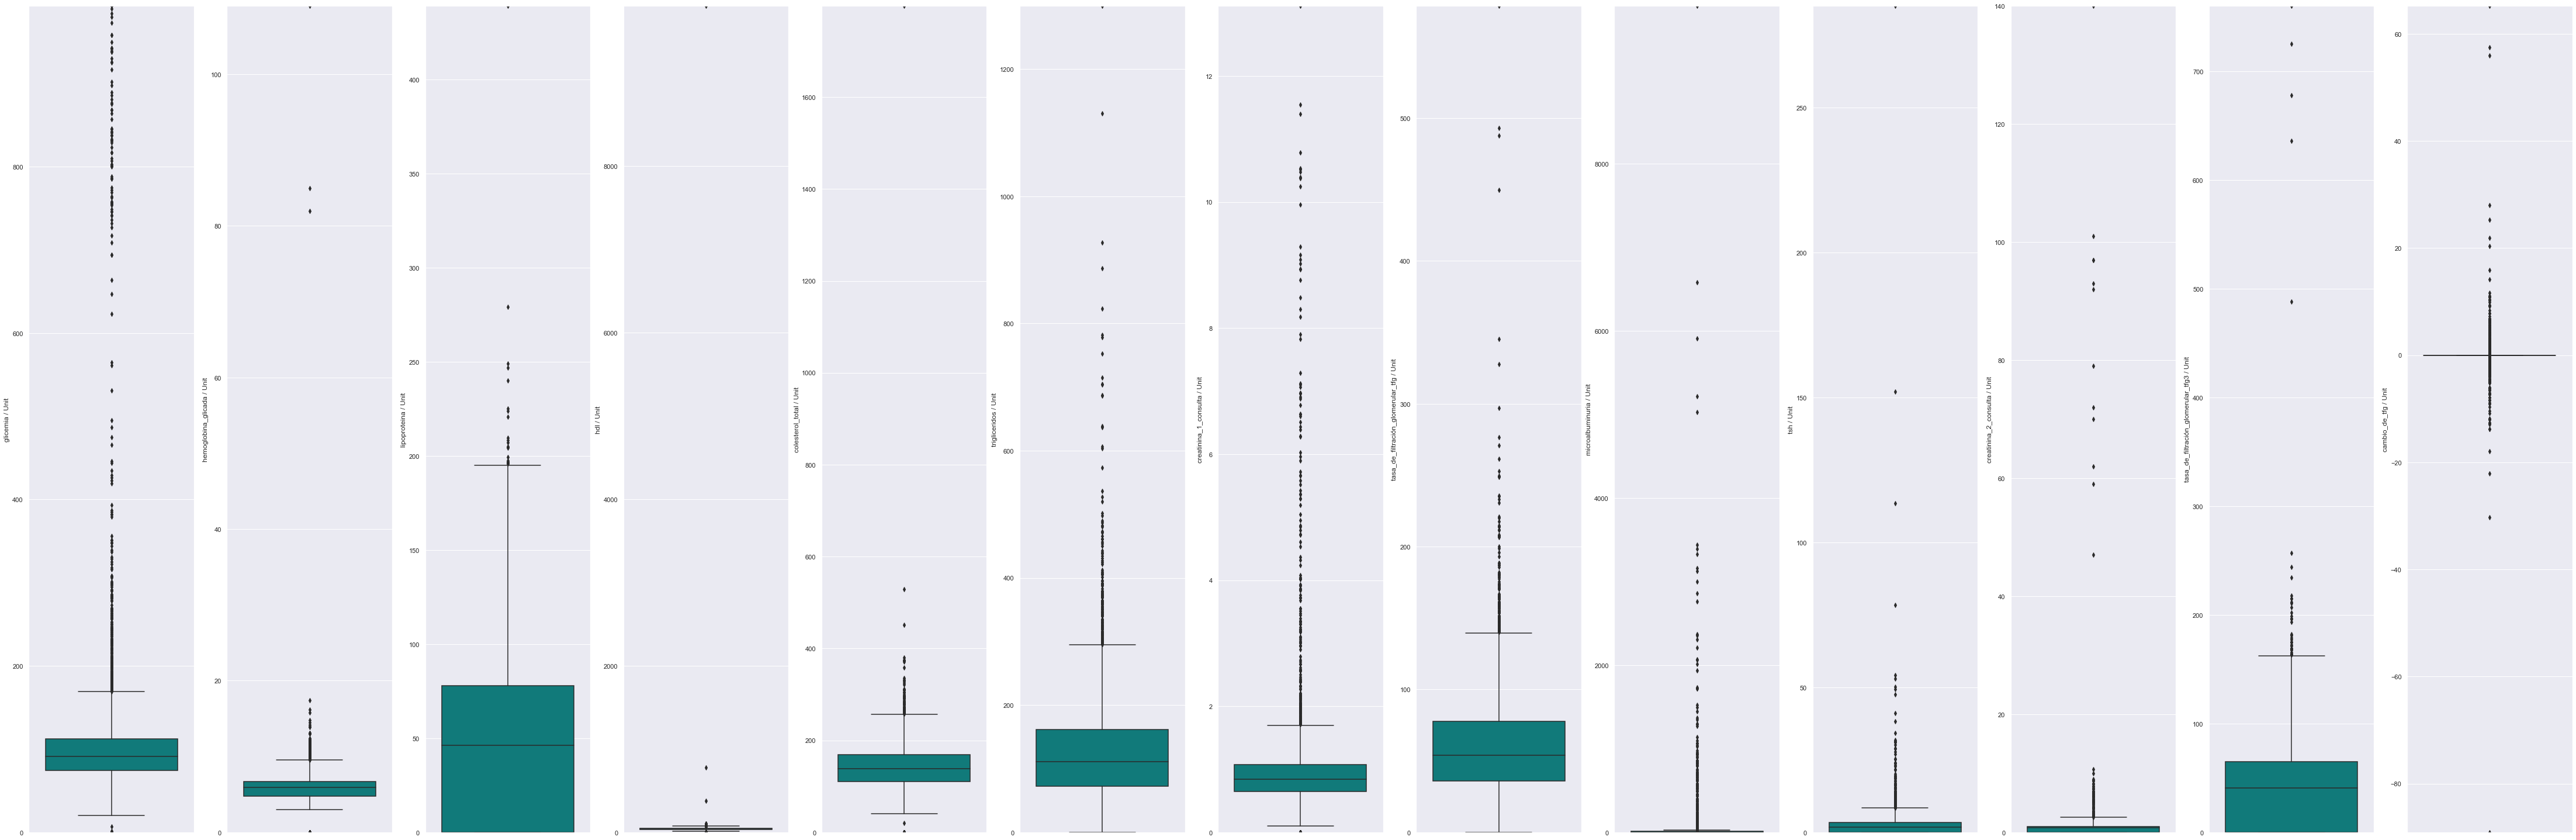

In [135]:
plt.rcParams['figure.figsize'] = (78,26)

fig, axes = plt.subplots(1, len(variable_list))
for i, col in enumerate(variable_list):
    ax = sns.boxplot(y=sub_df[col], ax=axes.flatten()[i], color='darkcyan')
    ax.set_ylim(sub_df[col].min(), sub_df[col].max())
    ax.set_ylabel(col + ' / Unit')
    
plt.show()

Now, we will explore variable by variable.

``glicemia``: a search for usual values that takes the results of this exam shows that, in general, between 70 and 100 mg ∙ dL-1 is considered normal, below 55 mg ∙ dL-1 is indicative of hypoglucemia and over 200 mg ∙ dL-1 is indicative of diabetes.

This variable has a lot of outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 55 and 200, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\2415263696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['glicemia'].replace(0, np.nan, inplace=True)


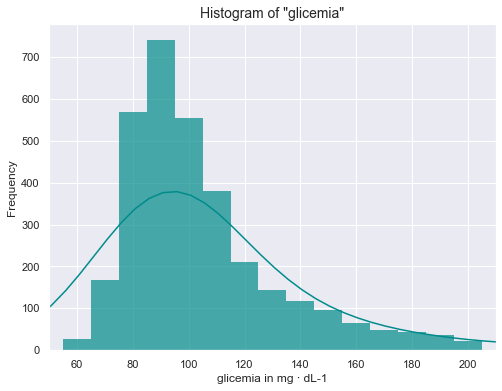

In [137]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['glicemia'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='glicemia', binwidth=10, kde=True,
            binrange=(55,200), color='darkcyan', alpha =.7)
plt.title('Histogram of "glicemia"', fontsize=14)
plt.xlabel('glicemia in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(50,210)
plt.show()

``hemoglobina_glicada``: a search for usual values that takes the results of this exam shows that, in general, below 5.7% is considered normal, between 5.8 and 6.4% is indicative of prediabetes and over 6.5% is indicative of diabetes.

This variable has some outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 20, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

It looks like the values are represented in percentage and not mg ∙ dL-1 as stated inicially.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\1207261878.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['hemoglobina_glicada'].replace(0, np.nan, inplace=True)


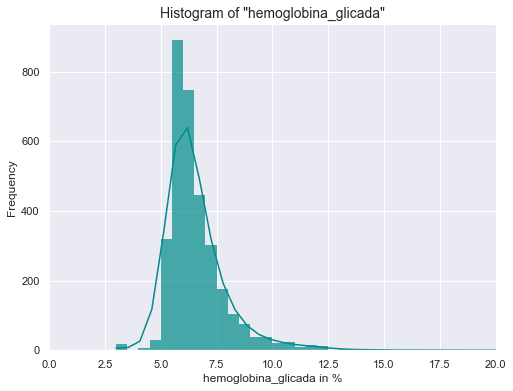

In [138]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['hemoglobina_glicada'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='hemoglobina_glicada', binwidth=.5, kde=True,
            binrange=(0,20), color='darkcyan', alpha =.7)
plt.title('Histogram of "hemoglobina_glicada"', fontsize=14)
plt.xlabel('hemoglobina_glicada in %', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,20)
plt.show()

``lipoproteina`` or 'bad cholesterol': a search for usual values that takes the results of this exam shows that, in general, below 70 mg ∙ dL-1 is considered normal and between 70 and 189 mg ∙ dL-1 are considered above normal.

This variable has some outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 189, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\1080969877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['lipoproteina'].replace(0, np.nan, inplace=True)


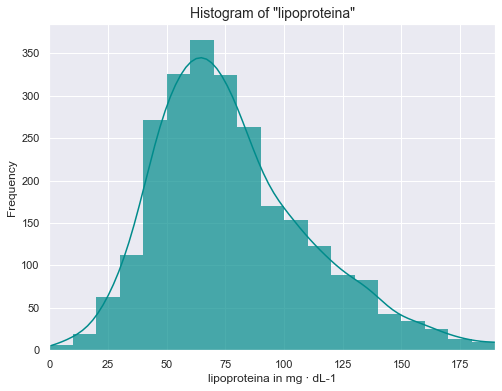

In [139]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['lipoproteina'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='lipoproteina', binwidth=10, kde=True,
            binrange=(0,190), color='darkcyan', alpha =.7)
plt.title('Histogram of "lipoproteina"', fontsize=14)
plt.xlabel('lipoproteina in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,190)
plt.show()

``hdl`` or 'good cholesterol': a search for usual values that takes the results of this exam shows that, in general, values between 40 and 60 mg ∙ dL-1 are desirable, but it's ok if values are higher. 

This variable has three evident outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 90, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\3935133337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['hdl'].replace(0, np.nan, inplace=True)


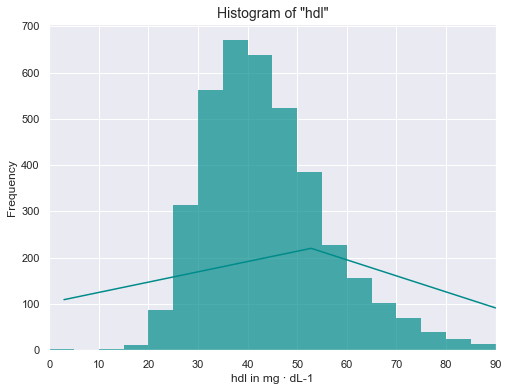

In [140]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['hdl'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='hdl', binwidth=5, kde=True,
            binrange=(0,90), color='darkcyan', alpha =.7)
plt.title('Histogram of "hdl"', fontsize=14)
plt.xlabel('hdl in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,90)
plt.show()

``colesterol_total``: a search for usual values that takes the results of this exam shows that, in general, values between 180 and 200 mg ∙ dL-1 are desirable, but it's ok if values are lower. 

This variable has a couple of evident outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 300, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\3394221739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['colesterol_total'].replace(0, np.nan, inplace=True)


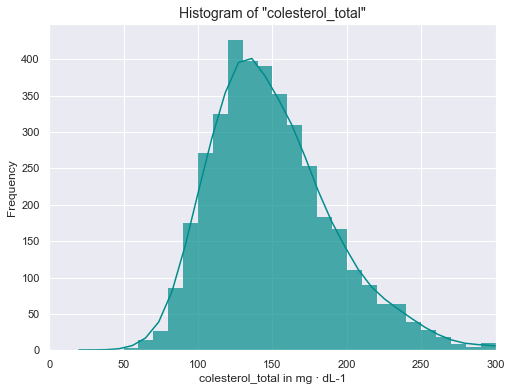

In [141]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['colesterol_total'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='colesterol_total', binwidth=10, kde=True,
            binrange=(0,300), color='darkcyan', alpha =.7)
plt.title('Histogram of "colesterol_total"', fontsize=14)
plt.xlabel('colesterol_total in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,300)
plt.show()

``trigliceridos``: a search for usual values that takes the results of this exam shows that, in general, values below 150 mg ∙ dL-1 are considered normal, values between 150 and 199 mg ∙ dL-1 are considered above normal, values between 200 and 499 mg ∙ dL-1 are considered high, and values above 500 mg ∙ dL-1 are very high. 

This variable has a several outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 500, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\1609020360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['trigliceridos'].replace(0, np.nan, inplace=True)


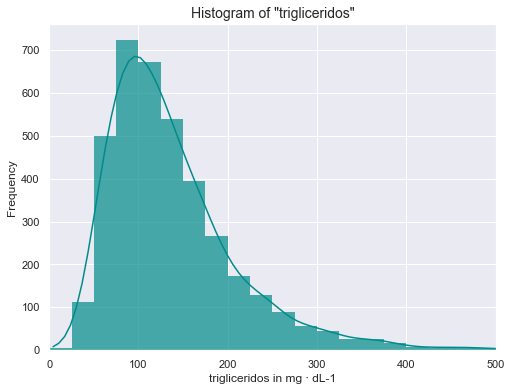

In [143]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['trigliceridos'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='trigliceridos', binwidth=25, kde=True,
            binrange=(0,500), color='darkcyan', alpha =.7)
plt.title('Histogram of "trigliceridos"', fontsize=14)
plt.xlabel('trigliceridos in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,500)
plt.show()

``microalbuminuria``: a search for usual values that takes the results of this exam shows that, in general, values below 30 mg ∙ dL-1 are considered normal, values between 30 and 300 mg ∙ dL-1 are indicative of kidney related diseases, and values above 300 mg ∙ dL-1 are very high. 

This variable has a several outliers according to the boxplot, thet seems to be related with typos, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 300, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\1761229917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['microalbuminuria'].replace(0, np.nan, inplace=True)


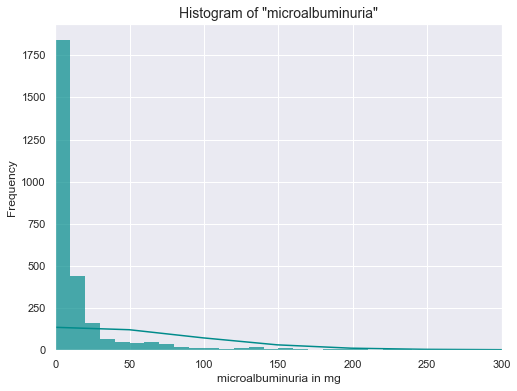

In [144]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['microalbuminuria'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='microalbuminuria', binwidth=10, kde=True,
            binrange=(0,300), color='darkcyan', alpha =.7)
plt.title('Histogram of "microalbuminuria"', fontsize=14)
plt.xlabel('microalbuminuria in mg', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,300)
plt.show()

``tsh``: a search for usual values that takes the results of this exam shows that, in general, values between 0.5 and 5 mU ∙ L-1 are considered normal, if higher, is indicative of underactive thyroid. 

This variable has a several outliers according to the boxplot, thet seems to be related with typos, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 0 and 300, respectively. Also, there is a lot of zero values that could be interpreted as NaN, but we will have to explore further on that.

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\3135458317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['tsh'].replace(0, np.nan, inplace=True)


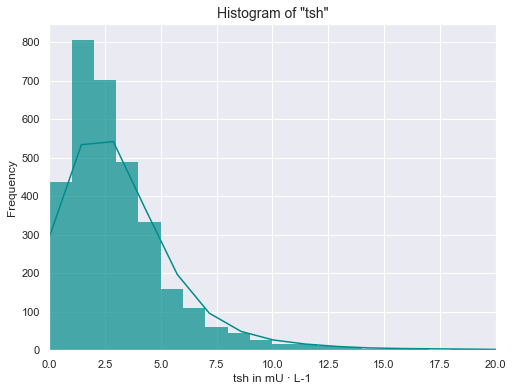

In [145]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['tsh'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='tsh', binwidth=1, kde=True,
            binrange=(0,20), color='darkcyan', alpha =.7)
plt.title('Histogram of "tsh"', fontsize=14)
plt.xlabel('tsh in mU ∙ L-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,20)
plt.show()

For ``creatinina_1_consulta``, ``creatinina_2_consulta``, ``tasa_de_filtración_glomerular_tfg`` and ``tasa_de_filtración_glomerular_tfg3`` we can make a comparative plot, as there's results in different moments

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\3931892863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['creatinina_1_consulta'].replace(0, np.nan, inplace=True)
C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\3931892863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['creatinina_2_consulta'].replace(0, np.nan, inplace=True)


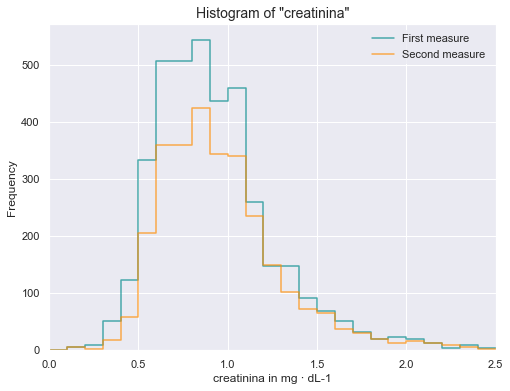

In [146]:
plt.rcParams['figure.figsize'] = (8,6)

graph_df = sub_df.dropna()
graph_df['creatinina_1_consulta'].replace(0, np.nan, inplace=True)
graph_df['creatinina_2_consulta'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()

sns.histplot(data=graph_df, x='creatinina_1_consulta', binwidth=.1, binrange=(0,2.5),
            alpha =.7, element='step', fill=False, color=  'darkcyan', label='First measure')
sns.histplot(data=graph_df, x='creatinina_2_consulta', binwidth=.1, binrange=(0,2.5),
            alpha =.7, element='step', fill=False, color='darkorange', label='Second measure')

plt.title('Histogram of "creatinina"', fontsize=14)
plt.xlabel('creatinina in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,2.5)
plt.legend()
plt.show()

C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\4159501916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['tasa_de_filtración_glomerular_tfg'].replace(0, np.nan, inplace=True)
C:\Users\jeygu\AppData\Local\Temp\ipykernel_21672\4159501916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['tasa_de_filtración_glomerular_tfg3'].replace(0, np.nan, inplace=True)


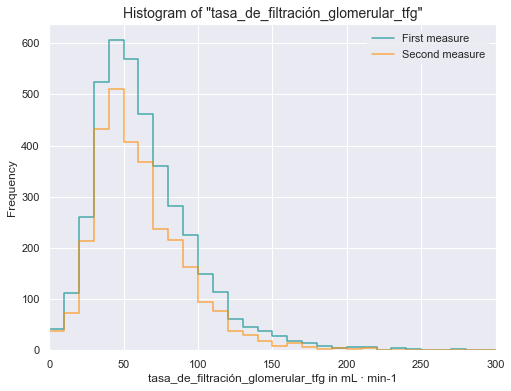

In [147]:
plt.rcParams['figure.figsize'] = (8,6)

graph_df = sub_df.dropna()
graph_df['tasa_de_filtración_glomerular_tfg'].replace(0, np.nan, inplace=True)
graph_df['tasa_de_filtración_glomerular_tfg3'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()

sns.histplot(data=graph_df, x='tasa_de_filtración_glomerular_tfg', binwidth=10, binrange=(0,300),
            alpha =.7, element='step', fill=False, color=  'darkcyan', label='First measure')
sns.histplot(data=graph_df, x='tasa_de_filtración_glomerular_tfg3', binwidth=10, binrange=(0,300),
            alpha =.7, element='step', fill=False, color='darkorange', label='Second measure')

plt.title('Histogram of "tasa_de_filtración_glomerular_tfg"', fontsize=14)
plt.xlabel('tasa_de_filtración_glomerular_tfg in mL ∙ min-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,300)
plt.legend()
plt.show()

A first insight considering the results is that every exam result can be considered an alternative or complement for another predictor, e.g. ``glicemia`` can be used for an analysis instead of ``diabetes`` if a continuous variable is needed instead of a discrete one. 